# Coupon Savvy Analysis

## Table Of Contents

1. [Setup And Initialization](#1.-Setup-And-Initialization)
   - [1.1 Import Libraries](#1.1-Import-Libraries)
   - [1.2 Import Dataset](#1.2-Import-Dataset)
   
2. [Initial Data Analysis](#2.-Initial-Data-Analysis)
   - [2.1 Summary Statistics](#2.1-Summary-Statistics)
      - [2.1.1 Numerical Data](#2.1.1-Numerical-Data)
      - [2.1.2 Categorical Data](#2.1.2-Categorical-Data)

3. [Data Cleaning And Transformation](#3.-Data-Cleaning-And-Transformation)
   - [3.1 Rename Columns](#3.1-Rename-Columns)
   - [3.2 Handling Missing Values](#3.2-Handling-Missing-Values)
   - [3.3 Handling Duplicates](#3.3-Handling-Duplicates)
   - [3.4 Correcting Anomalies](#3.4-Correcting-Anomalies)
    
4. [Data Preprocessing](#4.-Data-Preprocessing)
   - [4.1 Data Visualization before Features Engineering and Transformation](#4.1-Data-Visualization-before-Features-Engineering-and-Transformation)
   - [4.2 Features Engineering](#4.2-Features-Engineering)
      - [4.2.1 Checking on the Categorical Values](#4.2.1-Checking-on-the-Categorical-Values)
      - [4.2.2 Checking on the Numerical Values](#4.2.2-Checking-on-the-Numerical-Values)

5. [Modelling - Classification](#5.-Modelling---Classification)
   - [5.1 Preparation of Data - Set Role and Features Selection](#5.1-Preparation-of-Data---Set-Role-and-Features-Selection)
   - [5.2 Hyperparameter Tuning](#5.2-Hyperparameter-Tuning)
   - [5.3 Metrics Calculator and Model Evaluation Functions](#5.3-Metrics-Calculator-and-Model-Evaluation-Functions)
   - [5.A XGBoost Model Building](#5.A-XGBoost-Model-Building)
      - [XGBoost Base Model](#XGBoost-Base-Model)
      - [XGBoost Hyperparameter Tuning](#XGBoost-Hyperparameter-Tuning)
      - [XGBoost Model Evaluation](#XGBoost-Model-Evaluation)
      - [XGBoost Feature Importance](#XGBoost-Feature-Importance)
   - [5.B Decision Tree Model Building](#5.B-Decision-Tree-Model-Building)
      - [DT Base Model](#DT-Base-Model)
      - [DT Hyperparameter Tuning](#DT-Hyperparameter-Tuning)
      - [DT Model Evaluation](#DT-Model-Evaluation)
      - [DT Feature Importance](#DT-Feature-Importance)
   - [5.C Random Forest Model Building](#5.C-Random-Forest-Model-Building)
      - [RF Base Model](#RF-Base-Model)
      - [RF Hyperparameter Tuning](#RF-Hyperparameter-Tuning)
      - [RF Model Evaluation](#RF-Model-Evaluation)
      - [RF Feature Importance](#RF-Feature-Importance)
   - [5.D Neural Networks Model Building](#5.D-Neural-Networks-Model-Building)
      - [NN Base Model and Hyperparameter Tuning](#NN-Base-Model-and-Hyperparameter-Tuning)
      - [NN Model Evaluation](#NN-Model-Evaluation)
      - [NN Feature Importance](#NN-Feature-Importance)
      - [NN Testing Best Threshold](#NN-Testing-Best-Threshold)
        

6. [Models Comparison](#6.-Models-Comparison)

7. [Conclusion and Insights](#7.-Conclusion-and-Insights)


## Setup And Initialization

### Import Libraries

In [ ]:
#extract all the necessaire libraries
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

random.seed(15)

### Import Dataset

In [ ]:

df = pd.read_csv("data.csv")
df.head()

,Status,Date,user_id,campaign_category_name,campaign_subcategory_name,charged_value,number_of_people,Total value,shop_id,County,channel_type_name,priceBEFORE,priceAFTER,discount,estimated_price_per_person,showedUp
0,Valid,11/6/2013 11:14,42375,Health and beauty,Manicure&Pedicure,1.00,1,1.00,5004,Amadora,web,21.00,9.90,53,9.90,Confirmed_by_lack_of_response
1,Valid,11/6/2013 11:22,41081,Health and beauty,Hair Removal,1.00,1,1.00,1012,Lisboa,web,20.00,9.90,51,9.90,Confirmed_by_lack_of_response
2,Valid,11/6/2013 11:34,40812,Health and beauty,Hairdressers for women,3.80,1,3.80,4937,Lisboa,iphone,65.00,19.00,71,19.00,No_show
3,Valid,11/6/2013 11:50,1624,Restaurants,Brazilian,0.75,5,3.75,88,Lisboa,iphone,14.95,9.98,33,9.98,Confirmed_by_lack_of_response
4,Valid,11/6/2013 11:57,6155,Restaurants,Vegetarian,0.75,2,1.50,4998,Lisboa,web,6.80,4.90,28,4.90,No_show


### Dataset Description:


| VARIABLE                   | DESCRIPTION                                                                    | COMMENTS         |
|----------------------------|--------------------------------------------------------------------------------|------------------|
| Status                     | valid vs canceled reservation                                                  |                  |  
| Date                       | data                                                                           |                  |  
| user_id                    | user (customer) id                                                             |                  |  
| campaign_category_name     | category                                                                       |                  |
| campaign_subcategory_name  | subcategory                                                                    |                  |
| charged_value              | value paid by merchant, per person in booking, in that transaction             | in euros         |
| number_of_people           | number of people in the booking                                                |                  |
| Total value                | total value paid by merchant in that transaction                               | in euros         |
| shop_id                    | merchant id                                                                    |                  |
| County                     | city                                                                           |                  |
| channel_type_name          | channel originating booking                                                    |                  |
| priceBEFORE                | offer price before promotion                                                   | in euros         |
| priceAFTER                 | offer price with promotion                                                     | in euros         |
| discount                   | how much off regular off                                                       | in percentage    |
| estimated_price_per_person | estimation of campaign value for merchant, per person                          | in euros         |
| showedUp                   | indicates if booking was fulfilled                                             |                  |


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55321 entries, 0 to 55320
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Status                      55321 non-null  object 
 1   Date                        55321 non-null  object 
 2   user_id                     55321 non-null  int64  
 3   campaign_category_name      55321 non-null  object 
 4   campaign_subcategory_name   55321 non-null  object 
 5   charged_value               55321 non-null  float64
 6   number_of_people            55321 non-null  int64  
 7   Total value                 55321 non-null  float64
 8   shop_id                     55321 non-null  int64  
 9   County                      55321 non-null  object 
 10  channel_type_name           55321 non-null  object 
 11  priceBEFORE                 54987 non-null  float64
 12  priceAFTER                  55006 non-null  float64
 13  discount                    553

**Inferences:**

The dataset consists of 55321 entries and 16 columns. From a preliminary overview it seems that there are missing values in the following columns:

> **priceBEFORE:** A float column that contains the offer price before promotion. This column has a few missing values, with 54987 non-null entries out of 55321
>
> **priceAFTER:** This column, also a float data type, contains the offer price with promotion. It has some missing values, with 55006 non-null entries out of 55321.
>
> **estimated_price_per_person:** A float column representing the estimation of campaign value for merchant per person. It also has some missing values with 54756 non-null entries out ot 55321.
>
The next steps would include deeper data cleaning and preprocessing to handle missing values and to create new features that can help in achieving the project goals

## Initial Data Analysis

### Summary Statistics

#### Numerical Data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,55321.0,73434.120551,30617.677991,175.0,44894.00,82525.00,98898.00,116022.00
charged_value,55321.0,1.719013,2.307771,0.0,0.75,0.75,1.98,113.04
number_of_people,55321.0,1.884890,1.384156,0.0,1.00,2.00,2.00,38.00
Total value,55321.0,2.413534,2.614000,0.0,1.50,1.50,3.00,113.04
shop_id,55321.0,3849.231756,1852.981386,6.0,1603.00,4918.00,5120.00,5813.00
priceBEFORE,54987.0,46.261794,97.592251,0.0,10.90,20.00,50.00,2900.00
priceAFTER,55006.0,15.146505,16.022189,0.0,8.00,10.50,18.00,772.00
discount,55321.0,45.356646,21.883060,0.0,27.00,45.00,61.00,100.00
estimated_price_per_person,54756.0,13.128270,11.635216,0.0,7.95,10.50,15.00,772.00


#### Categorical Data

In [ ]:
df.describe(include='O').T

,count,unique,top,freq
Status,55321,4,Valid,44299
Date,55321,49232,3/4/2014 20:53,12
campaign_category_name,55321,6,Restaurants,31939
campaign_subcategory_name,55321,50,Japanese,19068
County,55321,106,Lisboa,34089
channel_type_name,55321,4,web,33662
showedUp,55321,4,Confirmed_by_lack_of_response,44531


**Inferences:**

- user_id:
    - The user_id range from 175 to 116022, helping in identifying unique costumers

- charged_values:
    - The average charged_value in a transaction is approximately 1.72.
    - The charged_value has a wide range with a minimum value of 0 and a maximum value of 113.04. Normally the values charged are low with 50% being 0.75 but there are some values stretching up to 113.04 indicating some outliers or might be dependent on the campaign category.
    - With a standard deviation of 2.31 compared to the mean of 1.79 this indicates a moderate spread of individual charges around the mean.

- number_of_people:
    - Encompasses bookings ranging from individuals to groups of up to 38, indicative of a wide spectrum of event sizes. Zero values may signify errors or cancellations.0

- Total value:
    - the average total_value in a transaction is approximately 2.41.
    - the total value  also shows a wide range from 0 to 113.04. Similar to the charged_values the presence if outliers is indicated by a large difference between the maximum and the 75th percentile values

- shop_id:
    - The shop_id ranges from 6 to 5813, helping in identyfiend unique merchants

- priceBEFORE:
    - the average priceBEFORE in a transaction is approximately 46.261794.
    - the priceBEFORE has a wide range with a minimum value of 0 which represent an anomalie and a maximum value of 2900, which indicates the presence of outliers
    - With a standard deviation of 97.592251, there is significant variation in the prices before discounts are applied. This might indicate a wide range of products or services with varying costs.

- priceAFTER:
    - the average priceAFTER in a transaction is approximately 15.15.
    - the priceAFTER has a wide range with a minimum value of 0 and a maximum value of 772, which indicated the presence of outliers

- discount:
    -  On average, customers receive a 45.36% discount, but the variation isn't as wide as the average suggests—the standard deviation (21.88%) is lower than the mean, indicating that while there's variability, most discounts are around that average mark.
    - the discount ranges from 0 to 100%. However, 100% discounts stand out as potentially unusual and might be due to special promotions, system errors, or specific marketing campaigns. These instances should be examined to ensure they're accurate and intentional.11

- estimated_price_per_person:
    - An average estimated price per person of €13.13 may serve as a baseline for comparison to actual prices paid.
    - It ranges from 0 to 772, which is significantly higher than the 75th percentile value. This suggests that the €772 figure could be an outlier, representing a rare, premium offering that's not typical of the usual cost range.

- Status:
    - There are 4 unique status.
    - The most frequent status is valid appearing 44299 times in the dataset

- Date:
    - There are 49232 unique dates.
    - The most frequent date is 3/4/2014 20:53, appearing 12 times in the dataset

- campaign_category_name:
    - There are 6 unique categories.
    - The most frequent is Restaurants appearing 31939 times in the dataset

- campaign_subcategory_name:
    - There are 50 unique subcategories
    - The most frequent is Japanese appearing 19068 times in the dataset

- County:
    - The transactions come from 106 different counties, with a dominant majority of the transactions(61,6%) originating from Lisbon

- channel_type_name:
    - There are 4 unique channel types.
    - The most frequent is web appearing 33662 times in the dataset

- showedUp:
    - There are 4 unique identifiers of the fullfilment of the reservation
    - The most frequent is "Confirmed_by_lack_of response" appearing 44531 times in the dataset

## Data Cleaning And Transformation

### Rename Columns

In [ ]:
df.rename(columns={'Date': 'date', 'Status': 'status', 'Total value': 'total value', 'County': 'county'}, inplace=True)

### Handling Missing Values

In [ ]:
# Missing values of each column
print(df.isnull().sum())
print("\n")
missing_percentage = df.isnull().sum() / len(df) * 100
print(f'Missing Values Percentage{missing_percentage}')

status                          0
date                            0
user_id                         0
campaign_category_name          0
campaign_subcategory_name       0
charged_value                   0
number_of_people                0
total value                     0
shop_id                         0
county                          0
channel_type_name               0
priceBEFORE                   334
priceAFTER                    315
discount                        0
estimated_price_per_person    565
showedUp                        0
dtype: int64


Missing Values Percentagestatus                        0.000000
date                          0.000000
user_id                       0.000000
campaign_category_name        0.000000
campaign_subcategory_name     0.000000
charged_value                 0.000000
number_of_people              0.000000
total value                   0.000000
shop_id                       0.000000
county                        0.000000
channel_type_name         

In [ ]:
"""
We have decided to drop the missing values from our dataset. These missing values account for less than 5% of our data.
"""

df.dropna(subset=['priceBEFORE', 'priceAFTER','estimated_price_per_person'], inplace=True)
print("\n")
print("After Handling of Missing Values")
print(df.isnull().sum())



After Handling of Missing Values
status                        0
date                          0
user_id                       0
campaign_category_name        0
campaign_subcategory_name     0
charged_value                 0
number_of_people              0
total value                   0
shop_id                       0
county                        0
channel_type_name             0
priceBEFORE                   0
priceAFTER                    0
discount                      0
estimated_price_per_person    0
showedUp                      0
dtype: int64


**Inferences**:

We observed a small percentage of missing values in columns 'priceBEFORE', 'priceAFTER', and 'estimated_price_per_person', indicating **incomplete** data in the original dataset. We decided to drop them to ensure the accuracy and reliability of our analysis, as missing values can potentially skew results and compromise the integrity of our findings.Following the handling of missing values, the dataset is now complete with no missing values in any of the columns, ensuring data integrity for analysis.

### Handling Duplicates

In [ ]:
'''
We are verifying first which rows are repeating that shows the same values in the columns.
'''

# Columns to check rows with duplicates
subset=['status', 'date', 'user_id', 'campaign_category_name',
                                        'campaign_subcategory_name', 'charged_value', 'number_of_people',
                                        'total value', 'shop_id', 'county', 'channel_type_name',
                                        'priceBEFORE', 'priceAFTER', 'discount', 'estimated_price_per_person',
                                        'showedUp']

duplicates = df.duplicated(subset, keep = False)

df_duplicates = df[duplicates]
df_duplicates

,status,date,user_id,campaign_category_name,campaign_subcategory_name,charged_value,number_of_people,total value,shop_id,county,channel_type_name,priceBEFORE,priceAFTER,discount,estimated_price_per_person,showedUp
392,Invalid,11/15/2013 0:08,37853,Health and beauty,Hairdressers for women,1.0,1,1.0,4860,Lisboa,web,40.0,15.0,63,15.0,Confirmed_by_lack_of_response
393,Invalid,11/15/2013 0:08,37853,Health and beauty,Hairdressers for women,1.0,1,1.0,4860,Lisboa,web,40.0,15.0,63,15.0,Confirmed_by_lack_of_response
849,Invalid,11/25/2013 17:44,37873,Restaurants,Seafood Restaurants,3.0,2,6.0,852,Lisboa,web,60.0,30.0,50,15.0,Confirmed_by_lack_of_response
850,Invalid,11/25/2013 17:44,37873,Restaurants,Seafood Restaurants,3.0,2,6.0,852,Lisboa,web,60.0,30.0,50,15.0,Confirmed_by_lack_of_response
851,Invalid,11/25/2013 17:44,37873,Restaurants,Seafood Restaurants,3.0,2,6.0,852,Lisboa,web,60.0,30.0,50,15.0,Confirmed_by_lack_of_response
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54665,Not accepted by merchant,10/30/2014 23:46,73110,Health and beauty,Spa & Massages,2.4,1,2.4,5138,Lisboa,android,30.0,12.0,60,12.0,Confirmed_by_lack_of_response
54707,Valid,10/31/2014 10:43,115741,Health and beauty,Spa & Massages,1.8,1,1.8,645,Porto,android,25.0,9.0,64,9.0,Confirmed_by_lack_of_response
54708,Valid,10/31/2014 10:43,115741,Health and beauty,Spa & Massages,1.8,1,1.8,645,Porto,android,25.0,9.0,64,9.0,Confirmed_by_lack_of_response
54950,Valid,11/1/2014 9:42,115842,Health and beauty,Body Care Treatments,2.4,1,2.4,5116,Cascais,web,25.0,12.0,52,12.0,Confirmed_by_lack_of_response


In [ ]:

df.drop_duplicates(subset=subset, keep='last')

df

,status,date,user_id,campaign_category_name,campaign_subcategory_name,charged_value,number_of_people,total value,shop_id,county,channel_type_name,priceBEFORE,priceAFTER,discount,estimated_price_per_person,showedUp
0,Valid,11/6/2013 11:14,42375,Health and beauty,Manicure&Pedicure,1.00,1,1.00,5004,Amadora,web,21.00,9.90,53,9.90,Confirmed_by_lack_of_response
1,Valid,11/6/2013 11:22,41081,Health and beauty,Hair Removal,1.00,1,1.00,1012,Lisboa,web,20.00,9.90,51,9.90,Confirmed_by_lack_of_response
2,Valid,11/6/2013 11:34,40812,Health and beauty,Hairdressers for women,3.80,1,3.80,4937,Lisboa,iphone,65.00,19.00,71,19.00,No_show
3,Valid,11/6/2013 11:50,1624,Restaurants,Brazilian,0.75,5,3.75,88,Lisboa,iphone,14.95,9.98,33,9.98,Confirmed_by_lack_of_response
4,Valid,11/6/2013 11:57,6155,Restaurants,Vegetarian,0.75,2,1.50,4998,Lisboa,web,6.80,4.90,28,4.90,No_show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55316,Valid,11/3/2014 10:59,116022,Health and beauty,Dental,3.00,1,3.00,1086,Leiria,web,70.00,15.00,79,15.00,Confirmed_by_lack_of_response
55317,Valid,11/3/2014 11:01,108380,Health and beauty,Hairdressers for women,3.60,1,3.60,4937,Lisboa,web,75.00,18.00,76,18.00,Confirmed_by_lack_of_response
55318,Valid,11/3/2014 11:02,105498,Health and beauty,Manicure&Pedicure,1.38,1,1.38,4181,Lisboa,web,12.00,6.90,43,6.90,Confirmed_by_lack_of_response
55319,Valid,11/3/2014 11:07,115557,Health and beauty,Hairdressers for women,2.48,1,2.48,5599,Lisboa,android,25.00,9.90,60,9.90,Confirmed_by_lack_of_response


**Inferences**:

We've identified replicated rows where identical data repeats, indicating a **lack of uniqueness** in the dataset. To address this, we've opted to retain the most recent (last) duplicate within each pair, ensuring the dataset maintains uniqueness and mitigating any potential bias in our subsequent analysis caused by redundant data


### Correcting Anomalies


#### Although we already checked for duplicates, we also want to make sure that the same user is not purchasing more than 1 service at the same timing.

In [ ]:
# check the duplicates for the same user_id, date and campaign_subcategory_name
repeated_mask = df.duplicated(subset=['user_id', 'date', "campaign_subcategory_name"], keep=False)

repeated_df = df[repeated_mask]

repeated_df

,status,date,user_id,campaign_category_name,campaign_subcategory_name,charged_value,number_of_people,total value,shop_id,county,channel_type_name,priceBEFORE,priceAFTER,discount,estimated_price_per_person,showedUp
392,Invalid,11/15/2013 0:08,37853,Health and beauty,Hairdressers for women,1.00,1,1.00,4860,Lisboa,web,40.0,15.0,63,15.0,Confirmed_by_lack_of_response
393,Invalid,11/15/2013 0:08,37853,Health and beauty,Hairdressers for women,1.00,1,1.00,4860,Lisboa,web,40.0,15.0,63,15.0,Confirmed_by_lack_of_response
849,Invalid,11/25/2013 17:44,37873,Restaurants,Seafood Restaurants,3.00,2,6.00,852,Lisboa,web,60.0,30.0,50,15.0,Confirmed_by_lack_of_response
850,Invalid,11/25/2013 17:44,37873,Restaurants,Seafood Restaurants,3.00,2,6.00,852,Lisboa,web,60.0,30.0,50,15.0,Confirmed_by_lack_of_response
851,Invalid,11/25/2013 17:44,37873,Restaurants,Seafood Restaurants,3.00,2,6.00,852,Lisboa,web,60.0,30.0,50,15.0,Confirmed_by_lack_of_response
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54951,Valid,11/1/2014 9:42,115842,Health and beauty,Body Care Treatments,2.40,1,2.40,5116,Cascais,web,25.0,12.0,52,12.0,Confirmed_by_lack_of_response
54980,Valid,11/1/2014 12:59,115852,Restaurants,Japanese,0.75,2,1.50,5367,Lisboa,web,9.5,7.9,17,7.9,No_show
54981,Not accepted by merchant,11/1/2014 12:59,115852,Restaurants,Japanese,0.75,2,1.50,5367,Lisboa,web,9.5,7.9,17,7.9,Confirmed_by_lack_of_response
55267,Valid,11/2/2014 21:08,113703,Health and beauty,Face Care Treatments,8.75,1,8.75,5752,Lisboa,iphone,100.0,35.0,65,35.0,No_show


In [ ]:
"""
We've noticed that there are different statuses, priceBEFORE values, and shop_ids for the mentioned conditions.
Thus, we need to investigate and remove those rows accordingly
"""

groups = df.groupby(['date', 'user_id', 'campaign_subcategory_name'])
inconsistent  = groups.filter(lambda x: x['status'].nunique() > 1 and x['priceBEFORE'].nunique() > 1 and x["shop_id"].nunique()>1)

inconsistent_index = inconsistent.index

df_cleaned = df.drop(inconsistent_index)
df = df_cleaned.sort_values(by = ["user_id", "date", "campaign_subcategory_name"])

In [ ]:
"""
When everything is exactly the same we want to keep the last row
"""

df = df.drop_duplicates(subset=['date', 'user_id', 'campaign_subcategory_name'], keep='last')
df = df.sort_values(by=["user_id", "date", "campaign_subcategory_name"])

**Inferences:**

We aim to improve data quality by making sure that a user doesn't buy multiple services at the same time. Thus, the code starts by organizing the data based on the date, user ID, and service type.
Then, it checks for any differences in status, price, or shop id between purchases by the same user at the same time. Any conflicting information is removed to keep the data **accurate** and **consistent**.
After cleaning up duplicates, it ensures that each record is **unique** and **completes** the dataset.

#### Given the general statistics of the dataset, we found that the pricesBEFORE and priceAFTER may have some anomalies since the minimum value is 0.

In [ ]:
### Check occurrences of 0 in priceBEFORE and priceAFTER columns
occurrences_before = df[df['priceBEFORE'] == 0].shape[0]
print(f'Anomaly when priceBEFORE is 0: {occurrences_before}')
occurrences_after = df[df['priceAFTER'] == 0].shape[0]
print(f'Anomaly when priceBEFORE is 0: {occurrences_after}')
occurences_both = df[(df["priceBEFORE"] == 0) & (df["priceAFTER"]==0)].shape[0]
print(f"Anomaly when priceBEFORE and priceAFTER are 0: {occurences_both}")

# Check number of cases where priceAFTER > priceBEFORE
occurrences_after_higher = df[df['priceAFTER'] > df['priceBEFORE']].shape[0]
print(f'Anomaly when priceBEFORE is smaller than priceAFTER 0: {occurrences_after_higher}')

# Drop rows with 0 values in priceBEFORE and priceAFTER columns
df = df[(df['priceBEFORE'] != 0) & (df['priceAFTER'] != 0)]

# Check number of cases where priceAFTER > priceBEFORE after removing
occurrences_after_higher = df[df['priceAFTER'] > df['priceBEFORE']].shape[0]
print(f'Anomaly when priceBEFORE is smaller than priceAFTER 0 after removing anomalies: {occurrences_after_higher}')


# Drop rows where priceAFTER > priceBEFORE
df = df[df['priceAFTER'] <= df['priceBEFORE']]
print(f'Data Shape: {df.shape[0]}')

Anomaly when priceBEFORE is 0: 3480
Anomaly when priceBEFORE is 0: 3488
Anomaly when priceBEFORE and priceAFTER are 0: 3398
Anomaly when priceBEFORE is smaller than priceAFTER 0: 82
Anomaly when priceBEFORE is smaller than priceAFTER 0 after removing anomalies: 0
Data Shape: 50487


**Inferences:**

By checking for instances where priceBEFORE and priceAFTER are inexplicably set to 0, as well as instances where priceAFTER exceeds priceBEFORE, which suggests errors in the data, we ensure that our data aligns with the **“correctness”** dimension. This is because these operations will lead to the creation of a more reliable data set that accurately reflects the real-world scenario of voucher companies.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,50487.0,74213.448274,30308.170048,175.00,45246.00,83351.00,99443.5,116022.00
charged_value,50487.0,1.791915,2.383624,0.00,0.75,0.75,2.0,113.04
number_of_people,50487.0,1.860400,1.366793,0.00,1.00,2.00,2.0,38.00
total value,50487.0,2.465711,2.684668,0.00,1.50,1.50,3.0,113.04
shop_id,50487.0,4004.660249,1770.496112,6.00,3920.00,4953.00,5128.0,5813.00
priceBEFORE,50487.0,48.501910,99.035237,1.85,13.90,24.60,50.0,2900.00
priceAFTER,50487.0,16.045520,15.831971,1.00,8.90,11.00,19.0,772.00
discount,50487.0,45.645750,21.684114,0.00,27.00,45.00,62.0,98.00
estimated_price_per_person,50487.0,13.366385,11.807723,1.00,7.95,10.50,15.0,772.00


#### Given the critical role the discount plays in connecting individuals and merchants, we need to confirm its accuracy by applying the formula.

In [ ]:
close_equal_discount = np.isclose(df['discount'], 100 * (df['priceBEFORE'] - df['priceAFTER']) / df['priceBEFORE'], atol=1e-0)

# Filter the DataFrame based on the condition and count the number of rows that match
filtered_df_close_discount = df[close_equal_discount]
count_close_discount = filtered_df_close_discount.count()

print(count_close_discount)

status                        48932
date                          48932
user_id                       48932
campaign_category_name        48932
campaign_subcategory_name     48932
charged_value                 48932
number_of_people              48932
total value                   48932
shop_id                       48932
county                        48932
channel_type_name             48932
priceBEFORE                   48932
priceAFTER                    48932
discount                      48932
estimated_price_per_person    48932
showedUp                      48932
dtype: int64


In [ ]:
# Recalculate the discount column
df['discount'] = 100*(df['priceBEFORE'] - df['priceAFTER']) / df['priceBEFORE']

# Round the discount column to two decimal places
df['discount'] = df['discount'].round(2)

**Inferences:**

This analysis is crucial for the **Correctness** and **Consistency** dimensions of data quality. Ensures the accuracy of discount values by comparing them with the discount percentage calculated using a tolerance level, thus verifying that they are logically consistent and correctly calculated. This check helps identify anomalies or errors in discount data that can then be resolved to improve the overall quality of the dataset.

By recalculating and rounding the discount to two decimal places based on the original prices, we guarantee the consistency and correctness of the data, contributing to its stability over time. This increases **stakeholder confidence** in the accuracy of the data and subsequent analyses.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,50487.0,74213.448274,30308.170048,175.00,45246.00,83351.00,99443.50,116022.00
charged_value,50487.0,1.791915,2.383624,0.00,0.75,0.75,2.00,113.04
number_of_people,50487.0,1.860400,1.366793,0.00,1.00,2.00,2.00,38.00
total value,50487.0,2.465711,2.684668,0.00,1.50,1.50,3.00,113.04
shop_id,50487.0,4004.660249,1770.496112,6.00,3920.00,4953.00,5128.00,5813.00
priceBEFORE,50487.0,48.501910,99.035237,1.85,13.90,24.60,50.00,2900.00
priceAFTER,50487.0,16.045520,15.831971,1.00,8.90,11.00,19.00,772.00
discount,50487.0,45.650303,21.726744,0.00,27.27,45.41,62.22,98.14
estimated_price_per_person,50487.0,13.366385,11.807723,1.00,7.95,10.50,15.00,772.00


In [ ]:
"""
Check if the total values is always equal to charged_value * number_of_people
"""

exact_equal = np.isclose(df['total value'], df['charged_value'] * df['number_of_people'], atol=1e-0)
filtered_df_exact = df[exact_equal]

filtered_df_exact.count()

status                        50487
date                          50487
user_id                       50487
campaign_category_name        50487
campaign_subcategory_name     50487
charged_value                 50487
number_of_people              50487
total value                   50487
shop_id                       50487
county                        50487
channel_type_name             50487
priceBEFORE                   50487
priceAFTER                    50487
discount                      50487
estimated_price_per_person    50487
showedUp                      50487
dtype: int64

**Inferences:**

This analysis is crucial for maintaining the **Correctness** and **Consistency** dimensions of data quality. It ensures the accuracy of the total values by comparing them with the product of the charged value and the number of people using a tolerance level. This comparison confirms the logical consistency and correctness of the calculated total values. By detecting anomalies or errors in the total value calculation, it aids in improving the overall quality of the dataset.

In [ ]:
"""
We have noticed that there are bookings where the number of people is 0. We want to address this issue by confirming
if this only occurs when the "showedUp" status is "No_show".
"""
condition = ((df['number_of_people'] == 0) & (df['showedUp'] == "No_show")).sum() == (df['number_of_people'] == 0).sum()

# Print the result
condition

True

**Inferences:**

This code focuses on ensuring data **correctness**. If true, it validates that the "number_of_people" field correctly records zero only in the context of no-shows, which is acceptable for the business. If false, it indicates that there may be errors or inconsistencies in the data, requiring further investigation or data cleaning.

In [ ]:
"""
Check if the same shop_id always charge the same price for the different subcategories
"""

shop_id_subcat = df.groupby(['shop_id', 'campaign_subcategory_name'])
filtered_shop_id = shop_id_subcat.filter(lambda x: x['charged_value'].nunique() > 1)

# Now, sorting the filtered DataFrame by shop_id
sorted_filtered_shop_id= filtered_shop_id.sort_values(by='shop_id')

print("Rows where the same shop_id charges different values for the same campaign_subcategory_name, sorted by shop_id:")
sorted_filtered_shop_id

Rows where the same shop_id charges different values for the same campaign_subcategory_name, sorted by shop_id:


,status,date,user_id,campaign_category_name,campaign_subcategory_name,charged_value,number_of_people,total value,shop_id,county,channel_type_name,priceBEFORE,priceAFTER,discount,estimated_price_per_person,showedUp
32064,Not accepted by merchant,6/21/2014 15:41,103334,Health and beauty,Manicure&Pedicure,1.80,1,1.80,34,Loures,android,12.0,9.0,25.00,9.0,Confirmed_by_lack_of_response
38585,Canceled by client,7/31/2014 18:39,80639,Health and beauty,Manicure&Pedicure,4.00,1,4.00,34,Loures,iphone,28.0,20.0,28.57,20.0,Confirmed_by_lack_of_response
34618,Valid,7/8/2014 10:13,104729,Health and beauty,Body Care Treatments,9.80,1,9.80,34,Loures,web,360.0,49.0,86.39,49.0,Confirmed_by_lack_of_response
27406,Valid,5/20/2014 22:34,100764,Health and beauty,Spa & Massages,3.00,1,3.00,34,Loures,web,45.0,15.0,66.67,15.0,Confirmed_by_lack_of_response
27482,Valid,5/21/2014 14:24,91971,Health and beauty,Spa & Massages,3.00,1,3.00,34,Loures,iphone,45.0,15.0,66.67,15.0,Confirmed_by_lack_of_response
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54454,Canceled by client,10/30/2014 7:35,115167,Health and beauty,Spa & Massages,2.50,1,2.50,5813,Lisboa,iphone,20.0,10.0,50.00,10.0,Confirmed_by_lack_of_response
55274,Valid,11/2/2014 22:04,115984,Health and beauty,Spa & Massages,3.75,1,3.75,5813,Lisboa,web,30.0,15.0,50.00,15.0,Confirmed_by_lack_of_response
55280,Valid,11/2/2014 23:05,108055,Health and beauty,Spa & Massages,3.75,1,3.75,5813,Lisboa,web,30.0,15.0,50.00,15.0,Confirmed_by_lack_of_response
54802,Valid,10/31/2014 16:12,115788,Health and beauty,Spa & Massages,2.50,1,2.50,5813,Lisboa,web,20.0,10.0,50.00,10.0,Confirmed_by_lack_of_response


**Inferences:**

Inconsistencies in charged values are evident, particularly for the same campaign_subcategory_name within a single shop_id. For instance, "Body Care Treatments" at shop_id 34 reflects transactions with varying charged amounts (9.80 and 2.40). This suggests that the shop doesn't adhere consistently to fixed pricing for identical services.

In [ ]:
# Verify the outliers in priceBEFORE
price_filter = df[(df["priceBEFORE"] < 10.90) | (df["priceBEFORE"] > 50)]

price_filter_sorted = price_filter.sort_values(by="priceBEFORE")

price_filter_sorted

,status,date,user_id,campaign_category_name,campaign_subcategory_name,charged_value,number_of_people,total value,shop_id,county,channel_type_name,priceBEFORE,priceAFTER,discount,estimated_price_per_person,showedUp
15828,Canceled by client,3/8/2014 9:28,92745,Bars and Coffeeshops,Coffeshops and terraces,0.00,1,0.00,4083,Évora,web,1.85,1.0,45.95,1.0,Confirmed_by_lack_of_response
5482,Valid,1/24/2014 20:24,72962,Bars and Coffeeshops,Coffeshops and terraces,0.05,1,0.05,4083,Évora,web,1.85,1.0,45.95,1.0,Confirmed_by_lack_of_response
10150,Valid,2/10/2014 12:07,86093,Bars and Coffeeshops,Coffeshops and terraces,0.05,1,0.05,4083,Évora,web,1.85,1.0,45.95,1.0,Confirmed_by_lack_of_response
48403,Not accepted by merchant,9/26/2014 12:40,185,Products and services,Others,0.75,2,1.50,1418,Lisboa,web,2.00,1.0,50.00,1.0,Confirmed_by_lack_of_response
23560,Valid,4/24/2014 13:45,185,Products and services,Others,6.00,0,0.00,1418,Lisboa,web,2.00,1.0,50.00,1.0,No_show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55165,Valid,11/2/2014 12:23,115927,Health and beauty,Dental,24.75,1,24.75,827,Lisboa,web,2500.00,99.0,96.04,99.0,Confirmed_by_lack_of_response
54936,Valid,10/31/2014 23:47,115829,Health and beauty,Dental,24.75,1,24.75,827,Lisboa,web,2500.00,99.0,96.04,99.0,Confirmed_by_lack_of_response
55320,Valid,11/3/2014 11:14,116001,Health and beauty,Dental,24.75,1,24.75,827,Lisboa,web,2500.00,99.0,96.04,99.0,Confirmed_by_lack_of_response
21686,Valid,4/11/2014 13:34,96210,Health and beauty,Hair Removal,10.80,1,10.80,5009,Lisboa,web,2900.00,54.0,98.14,54.0,Confirmed_by_lack_of_response


In [ ]:
# Check what is the percentage of each status and showedUp
status_percentage = price_filter_sorted["status"].value_counts(normalize=True) * 100

# Calculate percentage of each show-up value
showup_percentage = price_filter_sorted["showedUp"].value_counts(normalize=True) * 100

print("Percentage of each status:")
print(status_percentage)
print("\nPercentage of each show-up:")
print(showup_percentage)

Percentage of each status:
Valid                       79.058465
Canceled by client          14.728165
Not accepted by merchant     5.865536
Invalid                      0.347834
Name: status, dtype: float64

Percentage of each show-up:
Confirmed_by_lack_of_response    80.568924
No_show                          16.505456
Confirmed                         2.592081
Partial_no_show                   0.333540
Name: showedUp, dtype: float64


#### In order to have a the smooth classification process, we decided to use IsolationForest model, which is fffective for high-dimensional datasets to isolates anomalies.

In [ ]:
# Define features
features = df.select_dtypes(include=['int64', 'float64']).columns

# Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=40)
df['outlier_iso_forest'] = iso_forest.fit_predict(df[features])


# Select only the normal data points (non-outliers)
df_clean_iso_forest = df[df['outlier_iso_forest'] != -1]
df=df_clean_iso_forest

In [ ]:
df.shape[0]

49983

## Data Preprocessing

### Data Visualization before Features Engineering and Transformation

#### Distinct Customers and Merchants

In [ ]:
# Distinct Customers and Merchants-to see the company is business cover range
distinct_customer_id = df['user_id'].nunique()
distinct_shop_id = df['shop_id'].nunique()
print(f'Distinct Customers:{distinct_customer_id}')
print(f'Distinct Merchants:{distinct_shop_id}')

Distinct Customers:22295
Distinct Merchants:819


**Inferences:**

Here, we can observe the current business reach of the company from both the perspectives of merchants and customers. In this dataset, we identified 22295 distinct customers and 819 distinct merchants with contractual relationships.

#### Channel

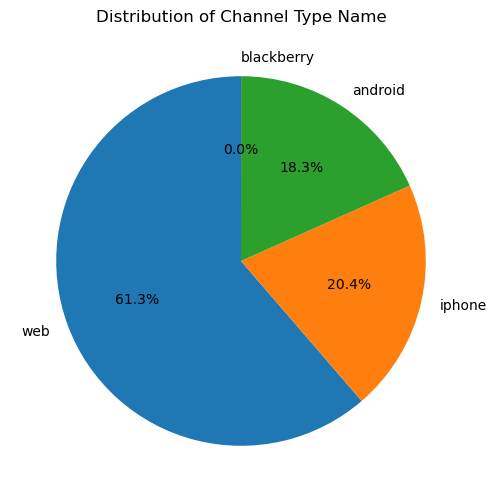

In [ ]:
# Pie chart for channel_type_name distribution
channel_type_counts = df['channel_type_name'].value_counts()
plt.figure(figsize=(6, 6))
channel_type_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Channel Type Name')
plt.ylabel('')
plt.show()

**Inferences:**

Since the frequency of blackberry is very low, just 1 out of 49882, so it shows 0 here. And we should note that the majority of people prefer to use the web for purchasing vouchers rather than opting for more convenient methods like mobile payments on iPhone and Android devices. So maybe the company paid more in promoting its website and building its own transactional system.

#### Top 10 county

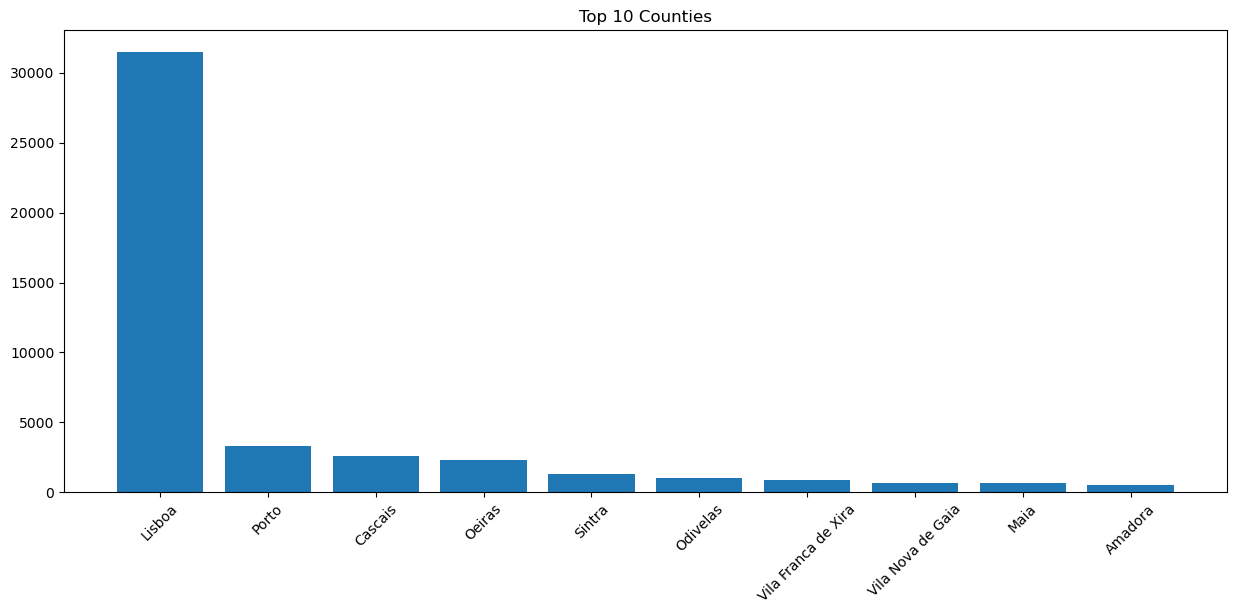

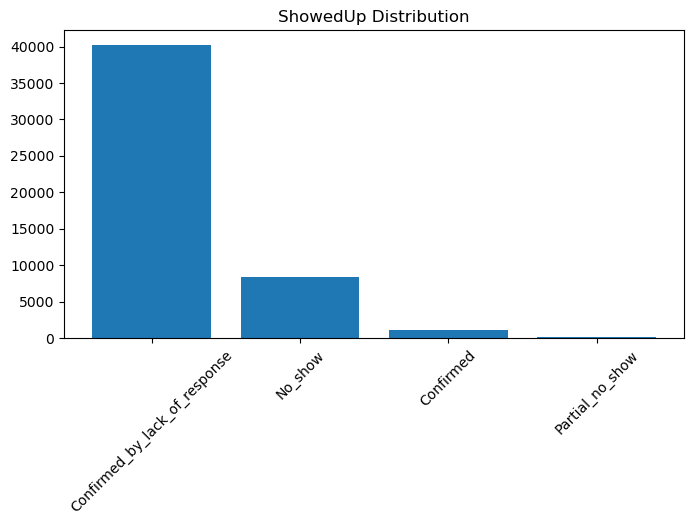

In [ ]:
# Show Top 10 county and See showedUp distribution in a table
top_counties = df['county'].value_counts().head(10)
showedUp = df['showedUp'].value_counts().head()

# Top countries Distribution
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
plt.bar(top_counties.index, top_counties.values)
plt.title('Top 10 Counties')
plt.show()

# ShowedUp Distribution
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
plt.bar(showedUp.index, showedUp.values)
plt.title('ShowedUp Distribution')
plt.show()


**Inferences:**

Here, we can see the top 10 counts for county in the dataset, and top 5 may be chosed for our creation of dummy variable for the further analysis of classification.

Regarding the 'ShowedUp' label in our analysis, it encompasses four distinct values. We defined 'Confirmed_by_lack_of_response' as those individuals who purchased vouchers and fulfilled their bookings by visiting the store, because of the occasional system issues. Also, 'Partial_no_show' denotes instances where some individuals failed to visit the store to fulfill their bookings but we don't have the exact ration of people who didn't went to the store. To enhance the clarity and objective of our classification, we reclassify 'Confirmed_by_lack_of_response' as 'Confirmed' and 'Partial_no_show' as 'No_show'."

#### Campaign_category_name distribution

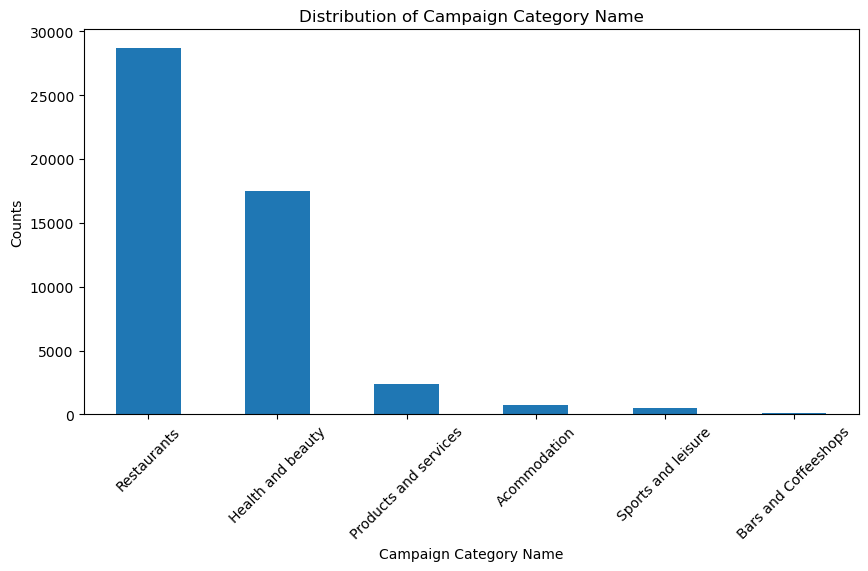

In [ ]:
# Bar chart for campaign_category_name distribution
campaign_category_counts = df['campaign_category_name'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
campaign_category_counts.plot.bar()
plt.title('Distribution of Campaign Category Name')
plt.ylabel('Counts')
plt.xlabel('Campaign Category Name')
plt.xticks(rotation=45)
plt.show()


**Inferences:**

Here, we have found that Restaurants are the most prevalent category for consumers, followed by Health and Beauty, and then Products and Services. However, this prompts us to consider the detailed distribution of subcategories within each campaign category.

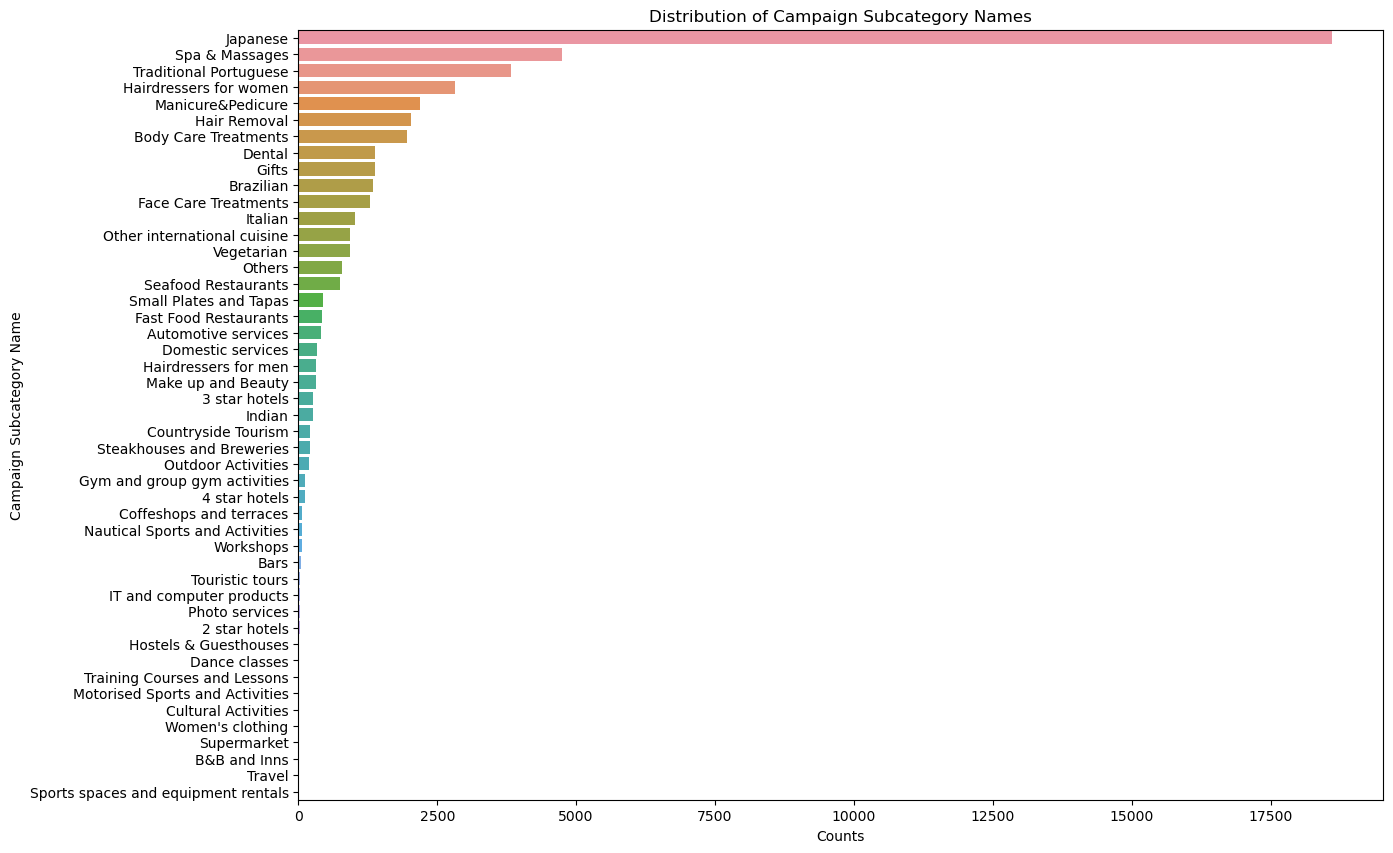

In [ ]:
# Create a DataFrame from the value counts of 'campaign_subcategory_name'
subcategory_counts = df['campaign_subcategory_name'].value_counts()

# Convert it to a DataFrame and reset the index to use it in a heatmap
subcategory_counts_df = subcategory_counts.reset_index()
subcategory_counts_df.columns = ['campaign_subcategory_name', 'counts']

# Sort the DataFrame by 'counts' in descending order for better visualization
subcategory_counts_df_sorted = subcategory_counts_df.sort_values(by='counts', ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(data=subcategory_counts_df_sorted, y='campaign_subcategory_name', x='counts')
plt.title('Distribution of Campaign Subcategory Names')
plt.xlabel('Counts')
plt.ylabel('Campaign Subcategory Name')
plt.show()

**Note:**
We attempted to visualize the distribution using a heatmap, but the result was cluttered. Therefore, we opted to group the data by category for better clarity.

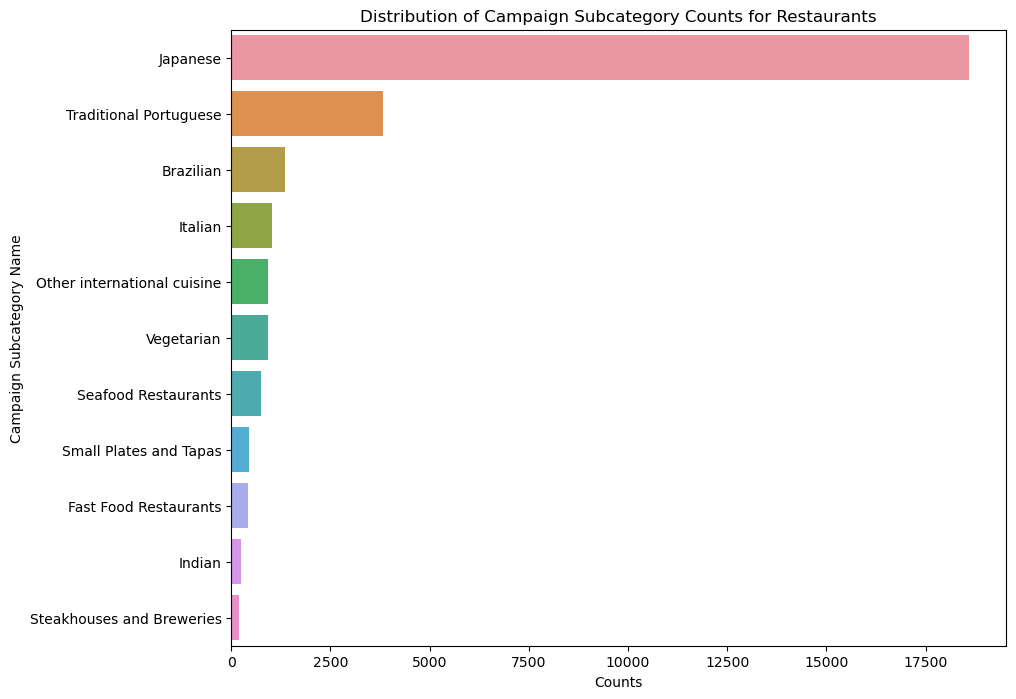

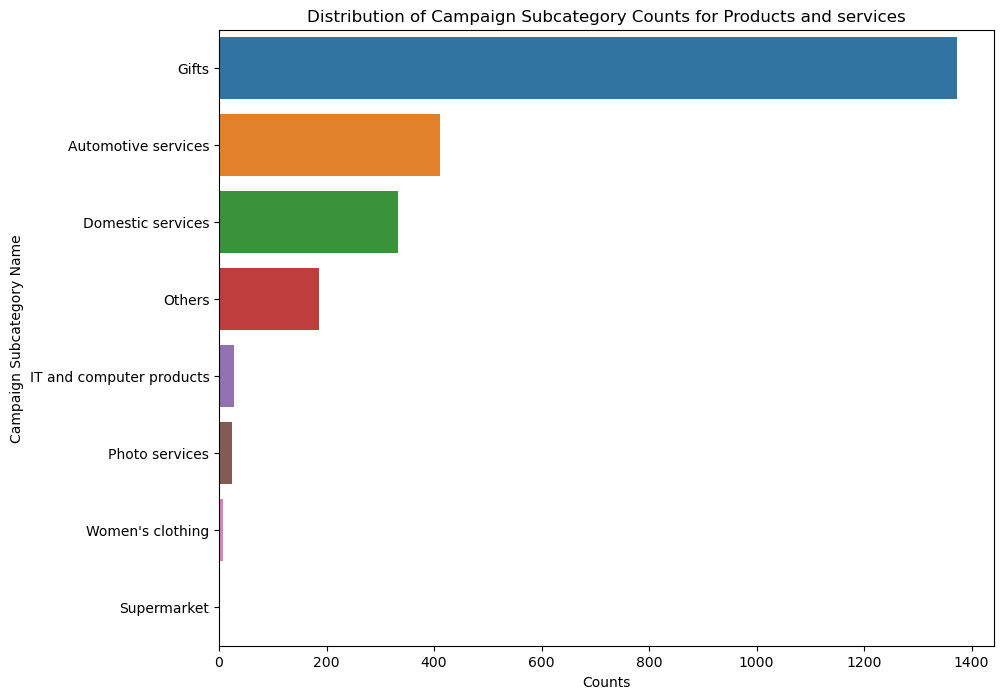

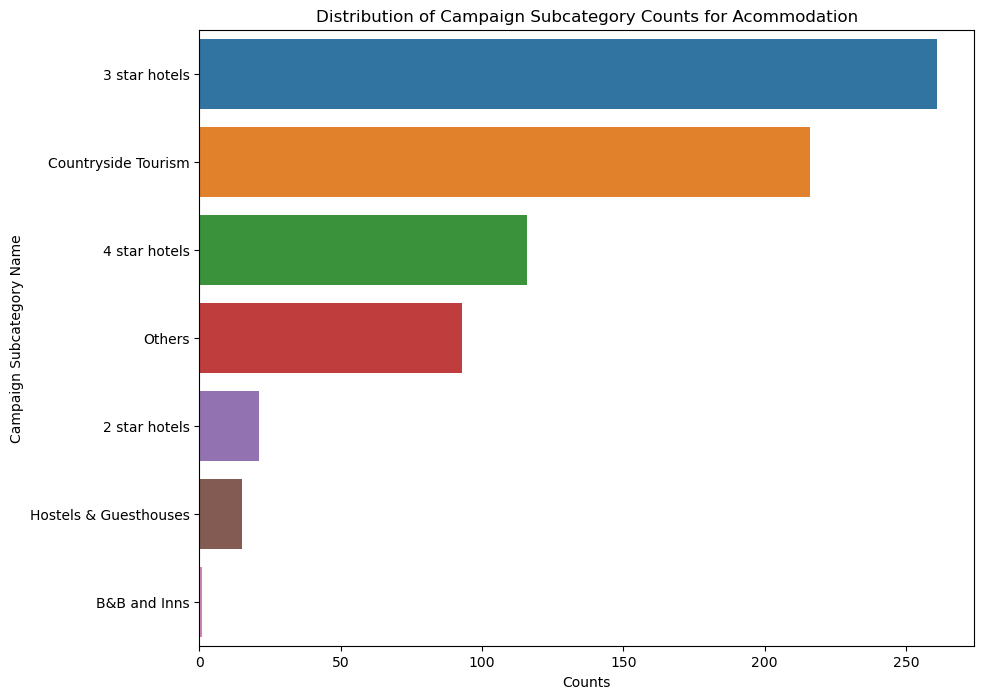

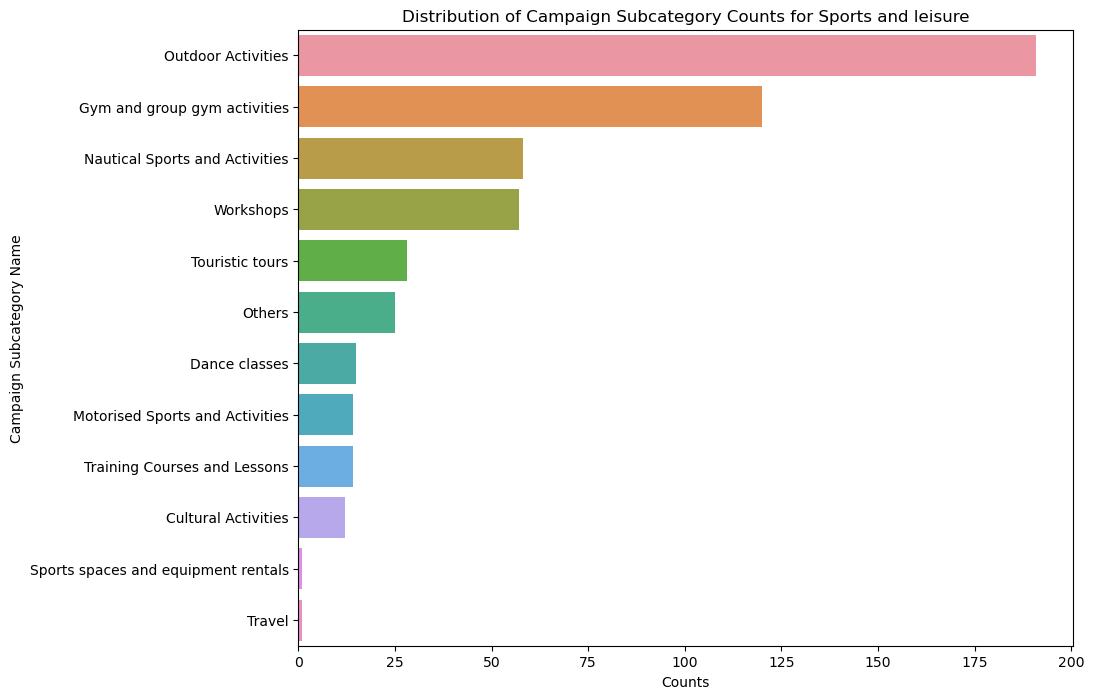

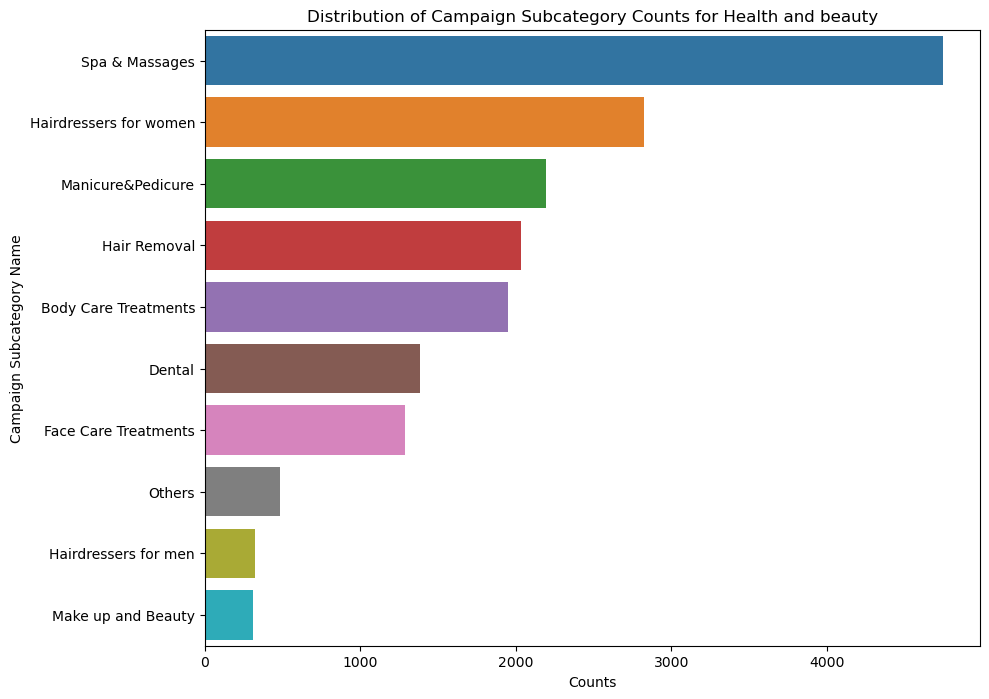

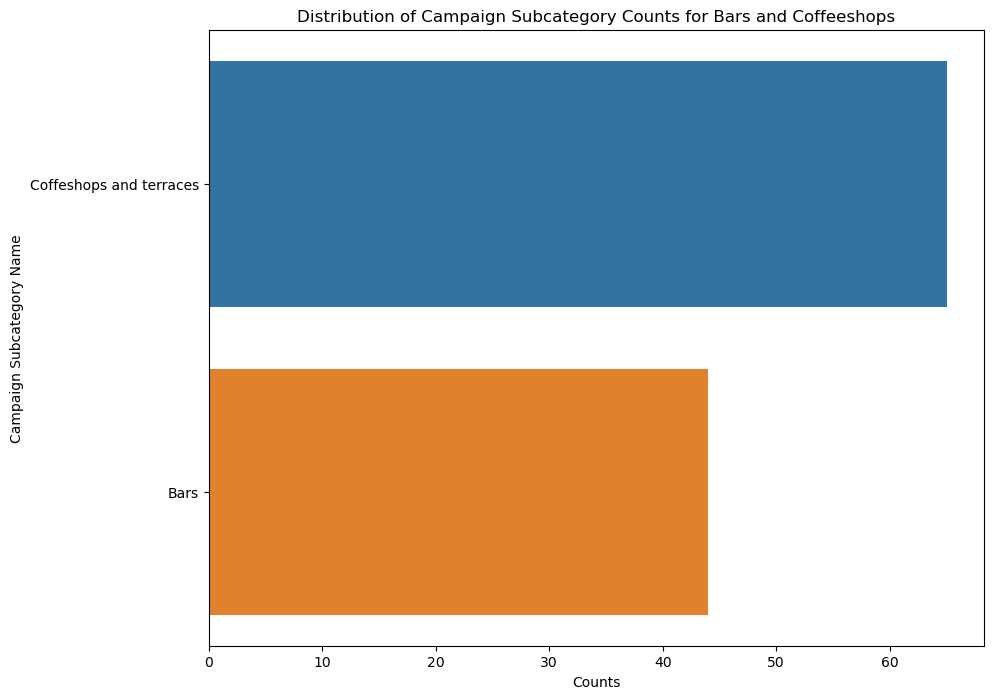

In [ ]:
# Group by 'campaign_category_name' and get value counts of 'campaign_subcategory_name'
category_subcategory_counts = df.groupby(['campaign_category_name', 'campaign_subcategory_name']).size().reset_index(name='counts')

# Get a list of unique campaign categories
unique_campaign_categories = df['campaign_category_name'].unique()

for category in unique_campaign_categories:
    # Filter the DataFrame for the current category
    category_data = category_subcategory_counts[category_subcategory_counts['campaign_category_name'] == category]

    # Sort the filtered DataFrame by 'counts' in descending order for better visualization
    category_data_sorted = category_data.sort_values(by='counts', ascending=False)

    # Create bar chart
    plt.figure(figsize=(10, 8))
    sns.barplot(data=category_data_sorted, x='counts', y='campaign_subcategory_name')
    plt.title(f'Distribution of Campaign Subcategory Counts for {category}')
    plt.xlabel('Counts')
    plt.ylabel('Campaign Subcategory Name')
    plt.show()



**Inferences:**

Here, we've gained insights into each campaign category. For example, within the **Restaurants** category, vouchers for Japanese restaurants are exceptionally popular, along with traditional Portuguese restaurants. Under the **Health and Beauty category**, we found that Spa & Massages, Hairdressers for women, and Manicure & Pedicure are the top subcategories.

In [ ]:
df['date'] = pd.to_datetime(df['date'])
oldest_date = df['date'].min()
latest_date = df['date'].max()
date_span = latest_date - oldest_date
date_span

/var/folders/kn/tp7wphlj3f580n1h9dxxn9bh0000gn/T/ipykernel_59215/1721104931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


Timedelta('361 days 23:53:00')

**Note:** Here, we utilized the date to determine the time span of our dataset, which spans approximately one year. Therefore, for the feature engineering step, we will consider the latest date in this dataset as the most recent, rather than using today's date, given the dataset's age.

#### Valid

<BarContainer object of 4 artists>

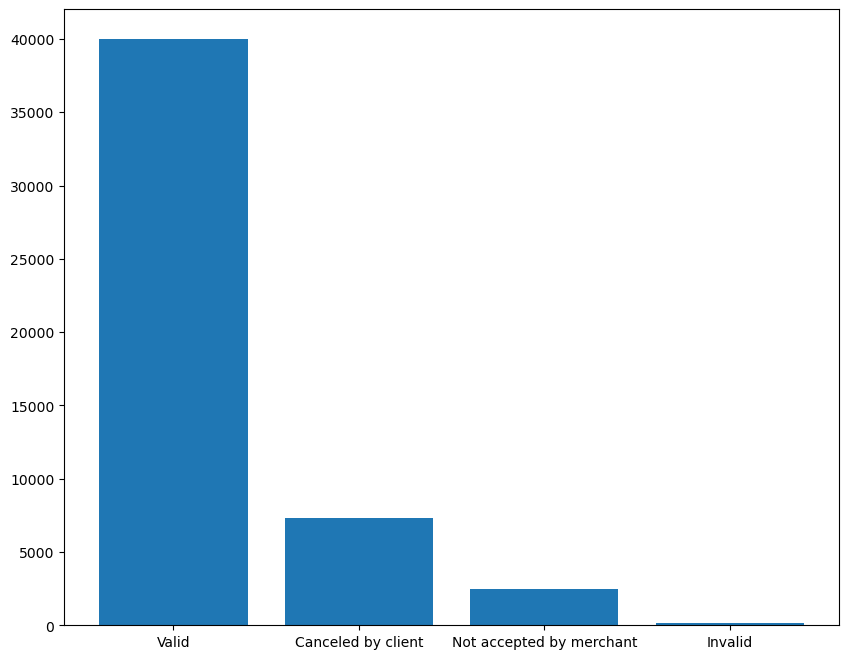

In [ ]:
status_counts = df['status'].value_counts()
plt.figure(figsize=(10, 8))
plt.bar(status_counts.index,status_counts.values)

#### Price

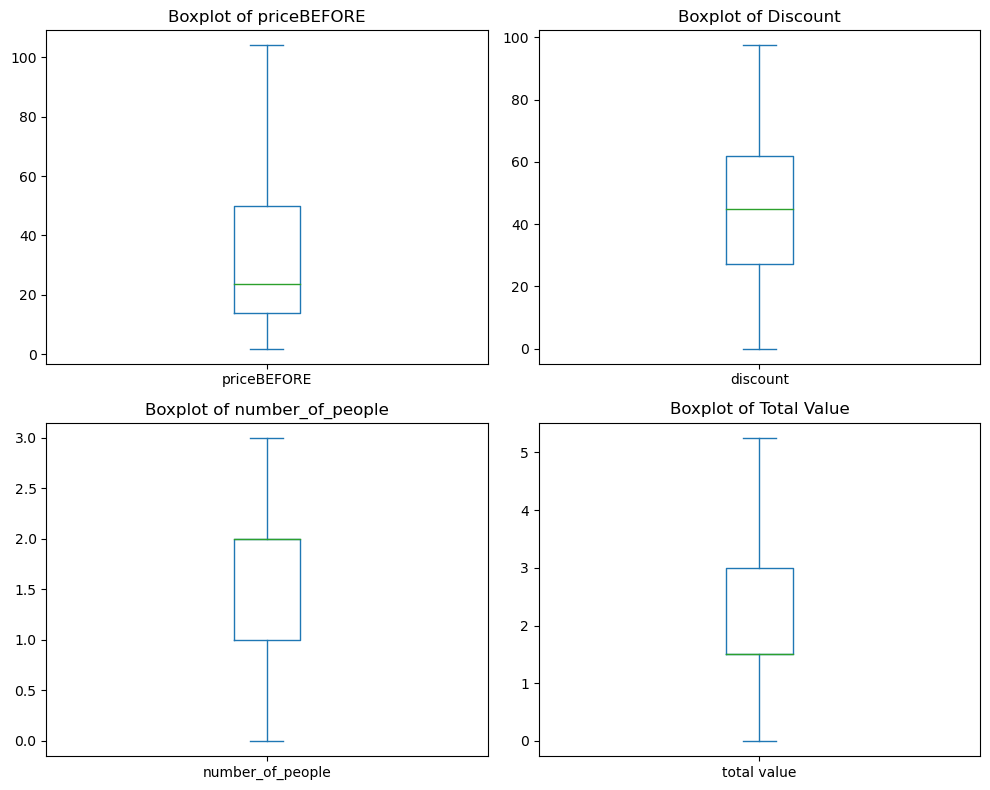

In [ ]:
plt.figure(figsize=(10, 8))

# Boxplot for 'priceBEFORE'
plt.subplot(2, 2, 1)
df['priceBEFORE'].plot(kind='box', showfliers=False)
plt.title('Boxplot of priceBEFORE')

# Boxplot for 'discount'
plt.subplot(2, 2, 2)
df['discount'].plot(kind='box', showfliers=False)
plt.title('Boxplot of Discount')

# Boxplot for 'number_of_people'
plt.subplot(2, 2, 3)
df['number_of_people'].plot(kind='box', showfliers=False)
plt.title('Boxplot of number_of_people')

# Boxplot for 'total_value'
plt.subplot(2, 2, 4)
df['total value'].plot(kind='box', showfliers=False)
plt.title('Boxplot of Total Value')

plt.tight_layout()
plt.show()


**Inferences:**

> **priceBEFORE:** This distribution signifies that a significant portion of prices fall within a relatively lower range (below 25%), with a notable increase in prices for some items beyond the median. This insight suggests a diverse range of pricing strategies among merchants, potentially catering to different market segments or offering varying levels of product quality or features.

> **Discount:** The median discount is roughly at the 50%, which could imply that merchants offer substantial discounts to attract group purchases and have a good contractual relationship with the company. (We choose one between discount and priceAFTER because they strongly correlated)

> **number_of_people:** Most frequent number for the number of people in one transaction is around 1 to 2 , indicating that most transactions involve single or few individuals. So, this may give company and merchants some insights like using referral discounts to attract more buyers per transaction.

> **Total Value:**  Most value is spread between 1.5 and 3, with a relatively small IQR, indicating customers generally spend a consistent amount per transaction. There are outliers showing some transactions with significantly higher spending, possibly linked to higher-priced offers.

## Features Engineering

In [ ]:
dfnew = df.copy()
dfnew

,status,date,user_id,campaign_category_name,campaign_subcategory_name,charged_value,number_of_people,total value,shop_id,county,channel_type_name,priceBEFORE,priceAFTER,discount,estimated_price_per_person,showedUp,outlier_iso_forest
2850,Valid,2014-01-02 13:06:00,178,Restaurants,Traditional Portuguese,0.75,2,1.50,5037,Lisboa,web,9.95,7.95,20.10,7.95,Confirmed_by_lack_of_response,1
5237,Canceled by client,2014-01-24 15:23:00,178,Products and services,Gifts,1.19,1,1.19,5126,Porto,web,19.95,7.95,60.15,7.95,Confirmed_by_lack_of_response,1
51655,Valid,2014-10-15 13:30:00,178,Restaurants,Japanese,0.75,2,1.50,5367,Lisboa,android,9.50,7.90,16.84,7.90,Confirmed_by_lack_of_response,1
52019,Valid,2014-10-17 13:26:00,178,Restaurants,Traditional Portuguese,0.75,2,1.50,5536,Lisboa,android,13.70,8.90,35.04,8.90,Confirmed_by_lack_of_response,1
52955,Valid,2014-10-22 13:36:00,178,Restaurants,Japanese,0.75,2,1.50,5369,Lisboa,android,7.50,6.90,8.00,6.90,Confirmed_by_lack_of_response,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55305,Valid,2014-11-03 09:41:00,116012,Restaurants,Japanese,0.75,5,3.75,5263,Oeiras,web,10.90,8.70,20.18,8.70,No_show,1
55306,Valid,2014-11-03 09:45:00,116013,Products and services,Gifts,2.99,1,2.99,5238,Matosinhos,web,49.90,19.90,60.12,19.90,Confirmed_by_lack_of_response,1
55309,Valid,2014-11-03 10:09:00,116015,Health and beauty,Spa & Massages,3.75,1,3.75,5813,Lisboa,web,30.00,15.00,50.00,15.00,Confirmed_by_lack_of_response,1
55313,Valid,2014-11-03 10:34:00,116016,Restaurants,Japanese,0.75,4,3.00,5077,Lisboa,iphone,7.50,6.50,13.33,6.50,No_show,1


In [ ]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49983 entries, 2850 to 55316
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   status                      49983 non-null  object        
 1   date                        49983 non-null  datetime64[ns]
 2   user_id                     49983 non-null  int64         
 3   campaign_category_name      49983 non-null  object        
 4   campaign_subcategory_name   49983 non-null  object        
 5   charged_value               49983 non-null  float64       
 6   number_of_people            49983 non-null  int64         
 7   total value                 49983 non-null  float64       
 8   shop_id                     49983 non-null  int64         
 9   county                      49983 non-null  object        
 10  channel_type_name           49983 non-null  object        
 11  priceBEFORE                 49983 non-null  float64

### Checking on the categorical values

In [ ]:
dfnew.describe(include='object').T

,count,unique,top,freq
status,49983,4,Valid,40023
campaign_category_name,49983,6,Restaurants,28715
campaign_subcategory_name,49983,47,Japanese,18602
county,49983,84,Lisboa,31468
channel_type_name,49983,4,web,30651
showedUp,49983,4,Confirmed_by_lack_of_response,40212


**Note:**

The reason we've retained all the categorical values in this column is because we believe 'Invalid' pertains more to the transaction itself. For instance, it may indicate instances where there isn't enough money in the customer's account or where the payment time has expired. Conversely, 'Cancelled by merchants or clients' reflects the differing intentions of the involved parties. Thus, we have opted to retain all values to ensure these distinctions are maintained. To mitigate multicollinearity, we have chosen to remove the 'status_Invalid' column.

Since there are 6 distinct values in this column, so we decide to use the top2 values to set dummy variables.

In [ ]:
# Define a function to classify values
def classify_show_up(value):
    if 'Confirmed_by_lack_of_response' in value:
        return 'Confirmed'
    elif 'Partial_no_show' in value:
        return 'No_show'
    else:
        return value

# Apply the classification function to create a new column
dfnew['showedUp_classification'] = dfnew['showedUp'].apply(classify_show_up)

# Convert the classification into a binary variable (0 or 1)
dfnew['showedUp'] = dfnew['showedUp_classification'].map({'Confirmed': 0, 'No_show': 1})

In [ ]:
dfnew.drop(columns=['outlier_iso_forest', 'showedUp_classification'], inplace=True)

**Note:**

As mentioned during the cleaning step, we addressed 'Confirmed_by_lack_of_response' as 'Confirmed' and 'Partial_no_show' as 'No_show' due to occasional system issues. This allows us to predict whether customers, after purchasing vouchers, will visit the store or not. This approach aims to enhance merchants' inventory management and preparation methods.

#### Status Anomalies

We have identified many rows, where the status is either "Cancelled by clients" or "Not accepted by merchant", however the target value "showedUp" isn't 0. Therefore we have presumed this is an inconsistency.

Based on the analysis the percentage of rows with this anomaly are many, therefore the best option is to transform the showedUp column value in "No_show", in the case of "Cancelled by clients", since the effectively the client never showed up.

For the rows where there is "Not accepted by merchant", we decided to drop them cause they client cannot either show up or not, and it is not fault of the client, so it cannot be used to predict either if she/he decided to go to the appointment.

Moreover, the percentage of rows for that values is quite low.

For the rows where the status is invalid, we presume those are transactions which didn't work, so for the classification model we need to drop them.

In [ ]:
#Status cancelled by client
total = dfnew.shape[0]
statuscanceled = dfnew[(dfnew["status"] == "Canceled by client")&(dfnew["showedUp"] == 0)]

statuscanceled_percent = statuscanceled["status"].count()/total*100
print(f"Number of rows where the client canceled the appointment {round(statuscanceled_percent,2)}%")

Number of rows where the client canceled the appointment 14.29%


In [ ]:
#Status not accepted by merchant

statusnotaccepted = dfnew[(dfnew["status"] == "Not accepted by merchant")]

statusnotaccepted_percent = statusnotaccepted["status"].count()/total*100
print(f"Number of rows where the merchant didn't accept the appointment {round(statusnotaccepted_percent,2)}%")

Number of rows where the merchant didn't accept the appointment 4.88%


In [ ]:
#Status invalid

statusinvalid = dfnew[(dfnew["status"] == "Invalid")]

statusinvalid_percent = statusinvalid["status"].count()/total*100
print(f"Number of rows where the status is invalid{round(statusinvalid_percent,2)}%")

Number of rows where the status is invalid0.36%


In [ ]:
#Dropping status not accepted by merchant and invalid

# Drop the rows
dfnew = dfnew.drop(index=statusnotaccepted.index)
dfnew = dfnew.drop(index=statusinvalid.index)

In [ ]:
dfnew.loc[(dfnew["status"] == "Canceled by client") & (dfnew["showedUp"] == 0), "showedUp"] = 1

#### Dropping features depending on the target value

The number of people and the status results as two features being dependent from the target value, therefore we need to drop them in order to have an unbiased model.

Dropping variables that are dependent on the target value is an essential step in data preparation to prevent data leakage, which can lead to overestimation of model performance. Data leakage occurs when information from outside the training dataset is used to create the model, causing the model to have access to data it wouldn't have in a real-world scenario.

In [ ]:
dfnew.drop(columns = ['status','number_of_people', 'total value'], inplace = True)

#### Date

In [ ]:
#Extracting the day of the week from the date column
dfnew['Day_Of_Week'] = dfnew['date'].dt.dayofweek

# Extracting the day of the month from the date column
dfnew['Day'] = dfnew['date'].apply(lambda x: x.day)

# Extracting the month from the date column
dfnew['Month'] = dfnew['date'].apply(lambda x: x.month)

# Extracting the hour from the date column
dfnew['Hour'] = dfnew['date'].apply(lambda x: x.hour)

# Extracting the minute from the date column
dfnew['Minute'] = dfnew['date'].apply(lambda x: x.minute)

#### Non numerical columns

##### Encoding

By one-hot encoding low-cardinality features, the model gains distinct columns for each category, enhancing interpretability without significantly expanding the feature space. Target encoding for high-cardinality features condenses the information into a single column per feature, retaining the nuances of each category's impact on the target while maintaining a manageable number of features, crucial for model performance and avoiding overfitting.

In [ ]:
# Apply one-hot encoding to low cardinality features
low_card_features = ['campaign_category_name', 'channel_type_name']
dfnew_encoded = pd.get_dummies(dfnew, columns=low_card_features, drop_first=True)

# Prepare for target and frequency encoding by specifying the features
high_card_features = ['campaign_subcategory_name', 'county']

# Apply target encoding for high cardinality features
target_encoder = ce.TargetEncoder(cols=high_card_features)
dfnew_encoded[high_card_features] = target_encoder.fit_transform(dfnew_encoded[high_card_features], dfnew_encoded['showedUp'])

In [ ]:
# Convert the one-hot encoded columns to integers
columns_to_convert = dfnew_encoded.iloc[:, -11:]

# Ensure the columns exist before conversion
columns_to_convert = [col for col in columns_to_convert if col in dfnew_encoded.columns]

# Convert specified columns to integers
dfnew_encoded[columns_to_convert] = dfnew_encoded[columns_to_convert].astype(int)
dfnew_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47364 entries, 2850 to 55316
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   date                                          47364 non-null  datetime64[ns]
 1   user_id                                       47364 non-null  int64         
 2   campaign_subcategory_name                     47364 non-null  float64       
 3   charged_value                                 47364 non-null  float64       
 4   shop_id                                       47364 non-null  int64         
 5   county                                        47364 non-null  float64       
 6   priceBEFORE                                   47364 non-null  float64       
 7   priceAFTER                                    47364 non-null  float64       
 8   discount                                      47364 non-null  f

In [ ]:
#Dropping rows that don't play a role in the classification process

df_new = dfnew_encoded.drop(columns = ['date','user_id','shop_id'])

### Checking on the numerical values

#### Variance

Remove features that are not relevant to the prediction. This includes features with no variance.

In [ ]:
features = df_new.drop(columns = "showedUp")

variances = features.var()

# Identify features with zero variance
features_with_no_variance = variances[variances == 0].index.tolist()
# Print features with no variance to review them
print("Features with no variance:", features_with_no_variance)

Features with no variance: []


In [ ]:
features = df_new.drop(columns="showedUp")

# Calculate the variances of each feature
variances = features.var()

# Print the variances
print("Variances of each feature:")
print(variances)

Variances of each feature:
campaign_subcategory_name                          0.005289
charged_value                                      2.665078
county                                             0.002668
priceBEFORE                                     4288.386395
priceAFTER                                        99.957237
discount                                         457.707622
estimated_price_per_person                        64.848836
Day_Of_Week                                        3.473917
Day                                               82.007046
Month                                             10.282306
Hour                                              27.211456
Minute                                           301.195220
campaign_category_name_Bars and Coffeeshops        0.002254
campaign_category_name_Health and beauty           0.221247
campaign_category_name_Products and services       0.042565
campaign_category_name_Restaurants                 0.240028
campaign_cate

**Note:**

In decision tree models, variance in features impacts split effectiveness rather than necessitating normalization. Low variance features may still influence accurate splits, while high variance ones, like monetary values, significantly aid in distinguishing outcomes. One-hot encoded and moderately varied features enhance prediction by revealing data nuances. Key to decision tree preparation is leveraging feature importance to guide utilization without pre-filtering based on variance alone.

#### Correlation

In [ ]:
# Correlation of all features with 'showedUp_binary'
corr = df_new.corr()['showedUp'].sort_values(ascending=False)

print(corr)

showedUp                                        1.000000
campaign_subcategory_name                       0.155957
county                                          0.117031
channel_type_name_iphone                        0.038488
Day_Of_Week                                     0.032741
priceAFTER                                      0.029490
discount                                        0.020466
estimated_price_per_person                      0.016928
channel_type_name_web                           0.015259
charged_value                                   0.012164
priceBEFORE                                     0.011582
campaign_category_name_Restaurants              0.008258
channel_type_name_blackberry                    0.008176
campaign_category_name_Products and services    0.007825
Minute                                          0.001491
campaign_category_name_Bars and Coffeeshops     0.001467
Day                                            -0.002384
campaign_category_name_Sports a

**Inference:**

The correlation analysis with the showedUp variable shows a spectrum of relationships between features and the likelihood of showing up. Features with the highest positive correlations, such as campaign_subcategory_name and campaign_category_name_Health and beauty, highlight that specific campaigns or services have a significant influence on attendance, suggesting that certain offers are more appealing. Moderately positive correlations observed in financial and geographic attributes like charged_value, discount, and county point towards the impact of perceived value and logistical convenience on the decision to attend. On the flip side, features like campaign_category_name_Restaurants and various time-related aspects exhibit slight negative correlations, hinting at lower attendance for restaurant-related events or due to scheduling inconveniences. Within the context of using a decision tree model, these linear correlations offer a preliminary understanding of which features might be impactful. However, decision trees delve deeper, exploring non-linear relationships and interactions between features to comprehensively identify the best predictors for showing up, surpassing the insights that simple correlation analysis can provide.

#### Check Imbalanced Data

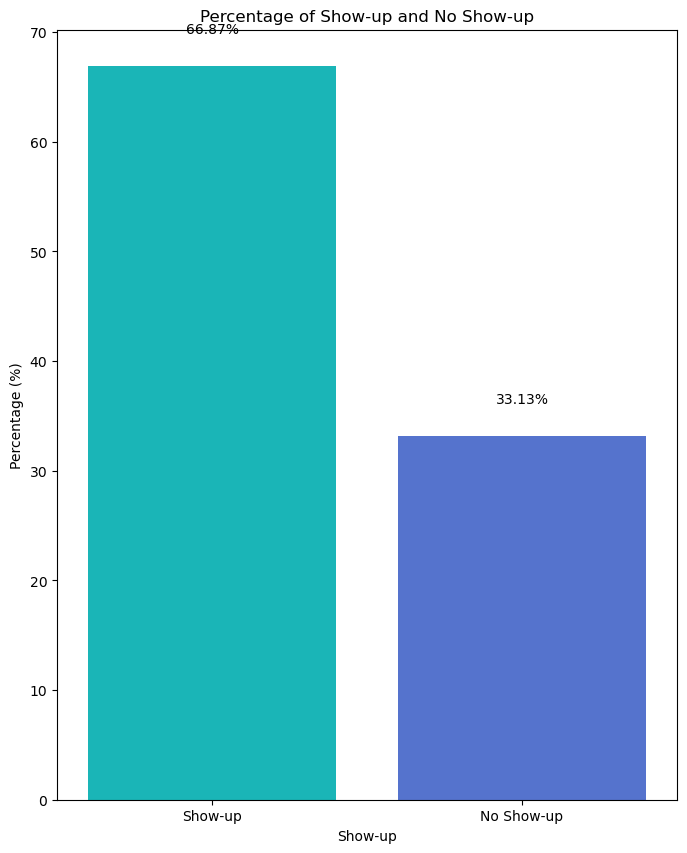

In [ ]:
# Calculating the percentage of each class
percentage = df_new['showedUp'].value_counts(normalize=True).sort_index() * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 10))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Show-up and No Show-up')
plt.xlabel('Show-up')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Show-up','No Show-up'])

for i, p in enumerate(percentage):
    ax.text(i, p + 3, f'{p:.2f}%', ha='center')  # Adjust text placement as needed

plt.show()

**Inference:**

The target of the dataset results highly imbalanced.
While this is not as severe as the minority class is about a third of the whole data, it can potentially lead to biased model performance, where the model might preferentially predict the majority class due to its higher occurrence in the dataset.
The usual way to solve is to oversample the class that has less values.

# Modelling-Classification

In [ ]:
dfnew = df_new.copy()

### Preparation of Data-Set role and features selection

In [ ]:
# Separate the features and the target variable for the training data
x = dfnew.drop(columns = "showedUp")
y = dfnew['showedUp']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize a StandardScaler object
scaler = StandardScaler()
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

#### Oversampling with SMOTE

Oversampling is a technique used to address class imbalance in a dataset where the number of instances in each class is not roughly equal. The imbalance can lead a model to become biased towards the majority class, potentially overlooking the minority class. Two common oversampling methods are random oversampling and Synthetic Minority Over-sampling Technique (SMOTE).

We have performed results of the three different models using both techniques. It has resulted the SMOTE technique as the best one according to the test dataset results, therefore we decided to use this for the models.

In [ ]:
#Oversampling to adjust the data imbalanced

oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train_scaled, y_train)

In [ ]:
# Calculating the percentage of each class
percentage = y_over.value_counts(normalize=True).sort_index() * 100
percentage

0    50.0
1    50.0
Name: showedUp, dtype: float64

##  Hyperparameter Tuning

In our voucher company's dataset, the target variable is 'showedUp', indicating if a customer redeemed their voucher (1) or not (0). False positives (predicting a no-show when they arrive) and false negatives (predicting an arrival when they don't) both impact our operations.

Minimizing false negatives is crucial to avoid missed revenue opportunities. Predicting no-shows when customers actually arrive could lead to lost sales. Therefore, maximizing recall for the 'showedUp' class (1) is essential.

Precision is also important to minimize false positives, ensuring we don't miss potential redemptions. Predicting arrivals when customers don't show could lead to missed promotion opportunities.

The F1-score, balancing precision and recall, is a suitable metric for model evaluation. The F1-score for the 'showedUp' class (1) is particularly crucial, reflecting the model's ability to accurately predict voucher redemptions while minimizing incorrect predictions' impact on our operations and customer satisfaction.

In [ ]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1', n_splits=10):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest F1-score for class 1 (no showedUP) is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

##  Metrics calculator and model evaluation functions

The provided functions model_evaluation and metrics_calculator are designed to assess and visualize the performance of a classification model on a dataset that contains two classes.

The evaluation includes generating classification reports (showing precision, recall, f1-score, and support for both classes), confusion matrices (visualizing true positives, false positives, true negatives, and false negatives), and ROC curves (illustrating the model's performance across different threshold settings for classifying the positive class).

Additionally, a table is generated to display key metrics specifically for the positive class, including Accuracy, Precision, Recall, F1-score, and AUC (Area Under the Curve), all important for understanding the model's ability to correctly identify and classify instances of the positive class.

In [ ]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    The metrics are calculated specifically for class 1.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [ ]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports,
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})

    # Define a colormap
    colors = [(1, 1, 1), (0.25, 0.41, 0.88)]  # White to royal blue
    royalblue = LinearSegmentedColormap.from_list("royalblue", colors)

    royalblue_r = royalblue.reversed()

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Plot ROC curve for test data and display AUC score
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show()

# XGBoost Model Building

## XGBoost Base Model

When it comes to evaluation, we're selecting 'logloss' as our metric. Log Loss, rooted in the Likelihood Function, holds significant importance for classification tasks relying on probabilities. It effectively encapsulates the model's predictive accuracy, with lower values indicating superior performance. Especially in binary classification, Log Loss adeptly quantifies uncertainty, offering valuable insights into model reliability and calibration.

In [ ]:
# Define the model
xgb_base = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

## XGBoost Hyperparameter Tuning

In [ ]:
param_grid_xgb = {
    'n_estimators': [350, 400],
    'learning_rate': [0.1, 0.15, 0.2],
    'max_depth': [8, 10],
    'subsample': [0.8, 0.85, 0.9],
    'colsample_bytree': [0.7, 0.8],
    'scale_pos_weight': [2, (y_train == 0).sum() / (y_train == 1).sum()]
}

In [ ]:
# Call the function for hyperparameter tuning
best_xgb, best_xgb_hyperparams = tune_clf_hyperparameters(xgb_base, param_grid_xgb, X_over, y_over)

In [ ]:
print('XGBoost Optimal Hyperparameters: \n', best_xgb_hyperparams)

XGBoost Optimal Hyperparameters: 
 {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 400, 'scale_pos_weight': 2, 'subsample': 0.9}


## XGBoost Model Evaluation

Next, let's assess the performance of our optimized XGBoost model by utilizing the model_evaluation function:

To streamline the evaluation of different models, we will define a set of functions that compute key performance metrics. This approach will ensure consistency in how we assess each model and facilitate comparisons between them:


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25398
           1       1.00      0.99      0.99     25398

    accuracy                           0.99     50796
   macro avg       0.99      0.99      0.99     50796
weighted avg       0.99      0.99      0.99     50796


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      6275
           1       0.74      0.64      0.69      3198

    accuracy                           0.80      9473
   macro avg       0.78      0.76      0.77      9473
weighted avg       0.80      0.80      0.80      9473



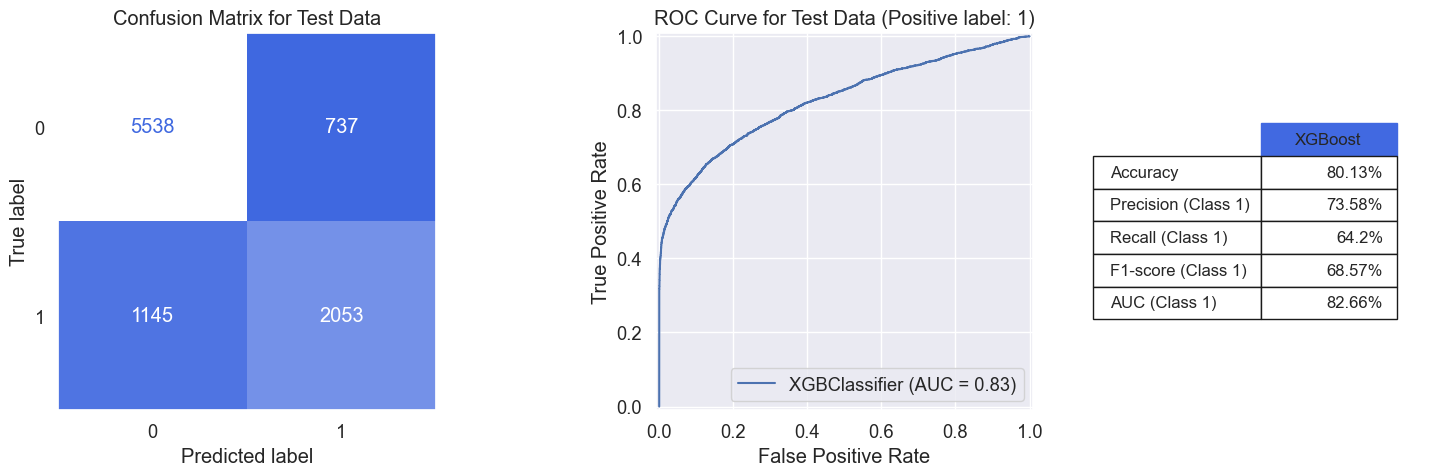

In [ ]:
model_evaluation(best_xgb, X_over, X_test_scaled, y_over, y_test, 'XGBoost')

***Inference on XGBOOST Model performance on test data:***

> **Model Accuracy (80.13%):** Exhibits high predictive accuracy, showcasing robust performance in voucher redemption and no-show predictions. The slight shortfall of 19.87% from perfect accuracy highlights a moderate number of incorrect predictions, encompassing both false positives and false negatives.

> **Precision for 'showedUp' (73.58%):** The model's precision indicates its efficiency in minimizing Type I errors (false positives) when predicting no-shows, thereby optimizing resource allocation. The remaining 26.42% represents the fraction of predictions where the model mistakenly identified no-shows as redemptions.

> ***Recall for 'showedUp' (64.2%):*** This metric shows the model's ability to identify true positives (actual redemptions), crucial for reducing Type II errors (false negatives) and protecting potential revenue. The 35.8% gap indicates missed opportunities where the model failed to recognize some actual voucher redemptions.

> ***F1-score for 'showedUp' (68.57%):*** The F1-score's level suggests a well-balanced precision and recall, highlighting the model's effectiveness. The difference of 31.43% points to potential areas for improving the model's balance between identifying true positives and avoiding false positives.

> ***AUC for 'showedUp' (82.66%):*** The model's AUC demonstrates its ability to discriminate between redeemed and unredeemed vouchers, facilitating optimal threshold setting. The minor 17.34% gap underscores a slight room for enhancing its discriminative capacity.

> The ***Confusion Matrix*** reveals the presence of a 1178 false positives and 719 false negatives, indicating the model's ability to effectively mitigate these errors.

> Furthermore, the consistency in metric scores across both the training and testing datasets suggests that the model demonstrates robust generalization capabilities and is not susceptible to overfitting.

In [ ]:
xgb_result = metrics_calculator(best_xgb, X_test_scaled, y_test, 'XGBoost')


## XGBoost Feature Importance

XGBoost, being a tree-based model, has the inherent ability to compute feature importances. Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

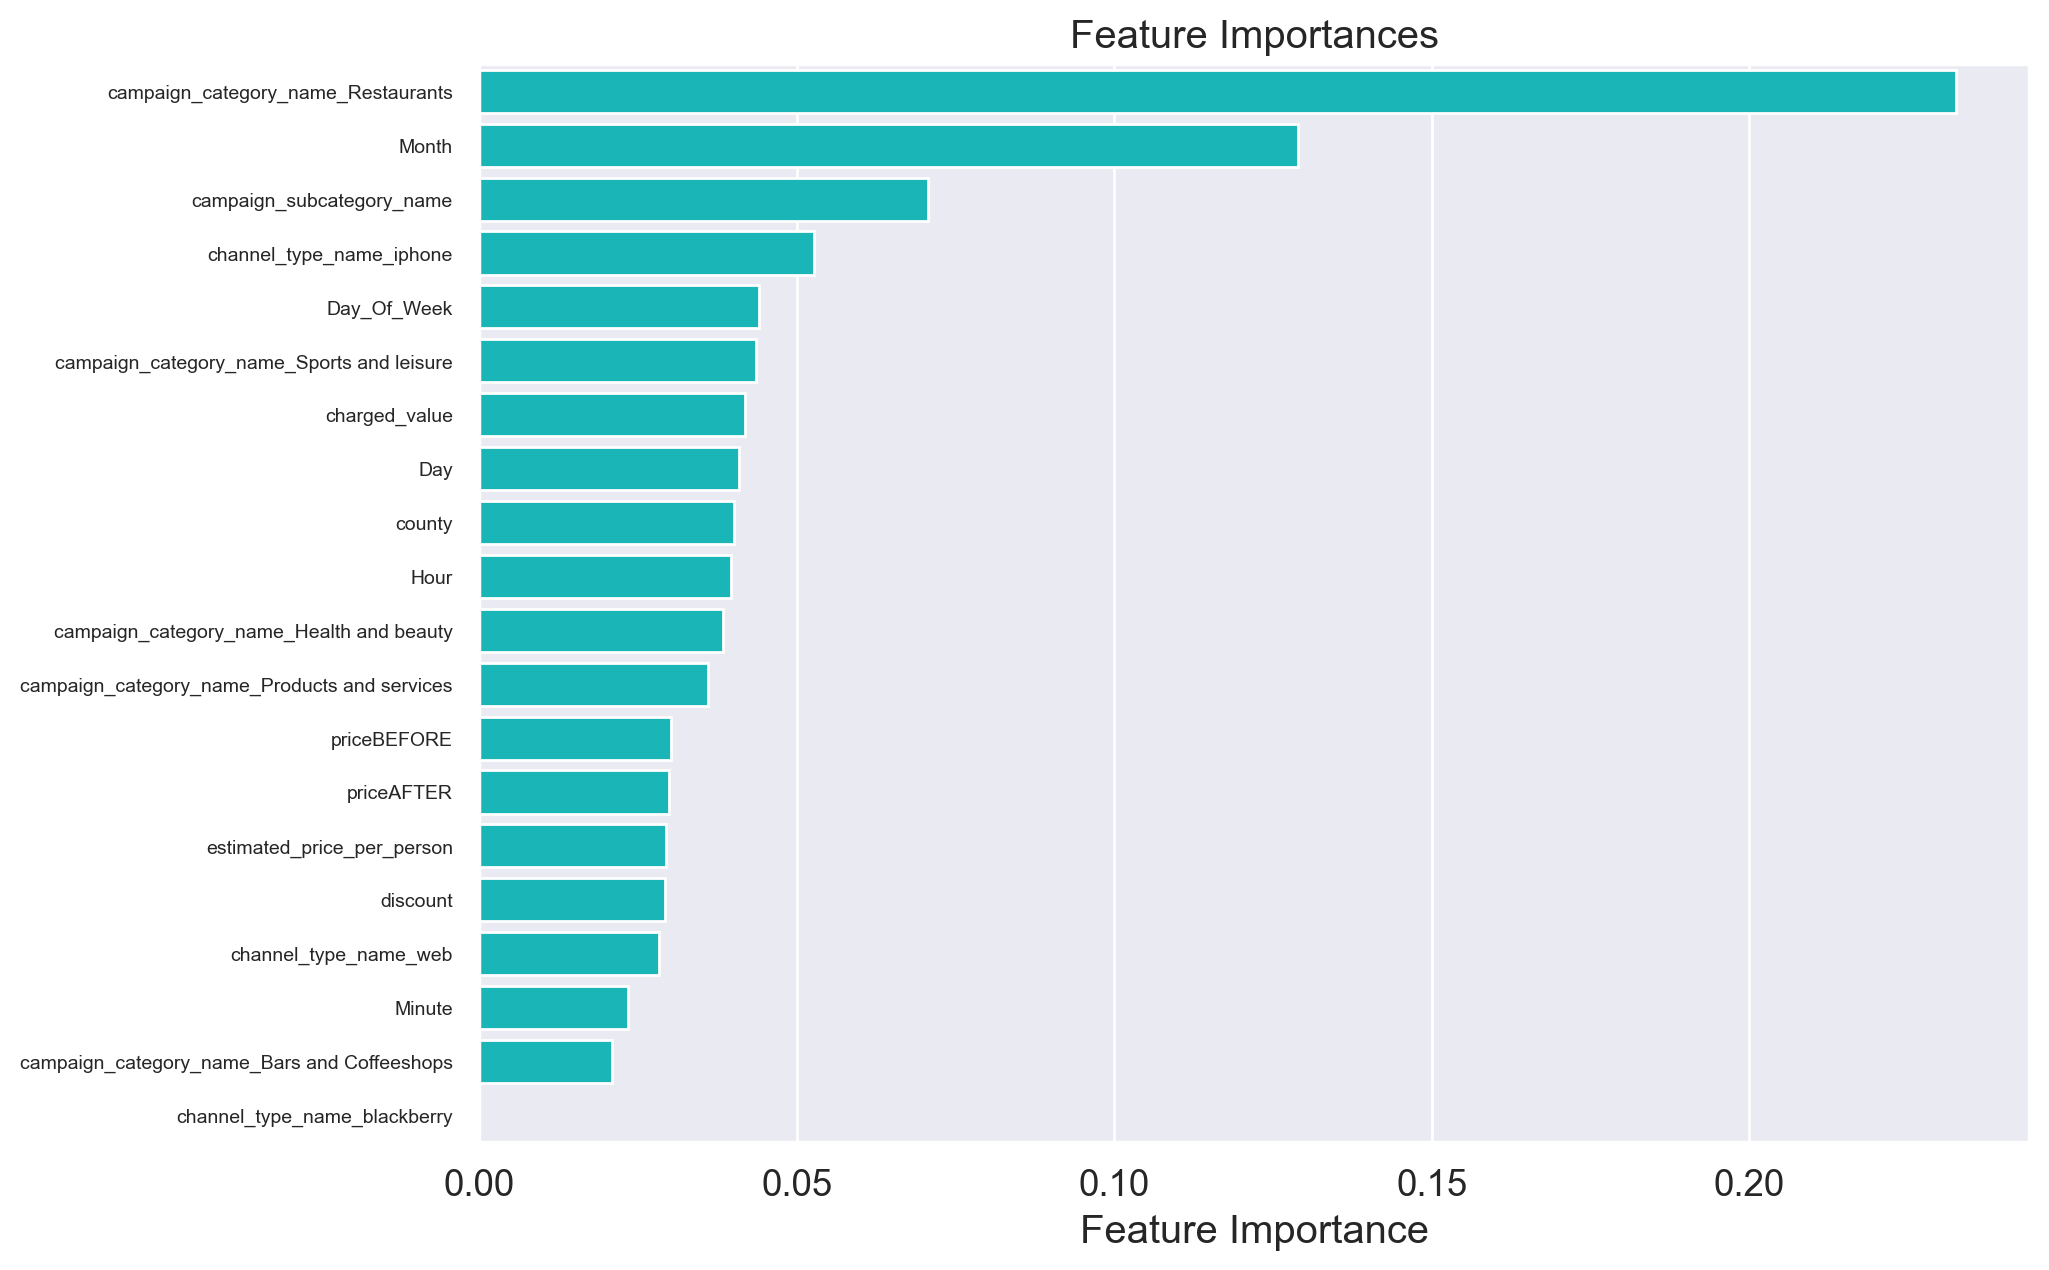

In [ ]:

feature_importances = best_xgb.feature_importances_

# Sort the feature importances in descending order and get the indices
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 7), dpi=200)
sns.barplot(x=feature_importances[sorted_indices], y=x.columns[sorted_indices], color='darkturquoise')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.yticks(fontsize=7)
plt.show()

The XGBoost model has found that features related to the number of people, the total value paid by the merchant, the status, the campaign category name specially related to the restaurants and products and services are the most important features for predicting shows up.
This indicates that demographic factors, economic value, the voucher’s active status and  the nature of the offering and the sector it belongs to are influential in a customer's decision to redeem a voucher.are key determinants in forecasting whether a customer will follow through with a redemption.

# Decision Tree Model Building

Next we are using Decision Tree Model.

The Decision Tree model offers simplicity, interpretability, and effectiveness. Its versatility in handling different data types and complex relationships suits our dataset well. Furthermore, its resilience to outliers and capability in managing imbalanced data meet our specific challenges. Overall, the Decision Tree model presents a practical and straightforward solution for our needs.

## DT Base Model

In [ ]:
dt_base = DecisionTreeClassifier(random_state = 0)

## DT Hyperparameter Tuning

In [ ]:
param_grid_dt = {
 "criterion" : ["gini", "entropy"],
 "max_depth" : [10, 12, 14],
 "min_samples_split" : [6, 8, 10],
 "min_samples_leaf" : [4, 5, 6],
 "class_weight": [{0:1, 1:w} for w in [3, 4, 5]]
}

In [ ]:
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_over, y_over)

In [ ]:
print("DT Optimal Hyperparameters: \n", best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 6}


## DT Model Evaluation


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.70      0.79     25398
           1       0.75      0.93      0.83     25398

    accuracy                           0.81     50796
   macro avg       0.83      0.81      0.81     50796
weighted avg       0.83      0.81      0.81     50796


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.64      0.73      6275
           1       0.52      0.77      0.62      3198

    accuracy                           0.68      9473
   macro avg       0.68      0.70      0.67      9473
weighted avg       0.74      0.68      0.69      9473



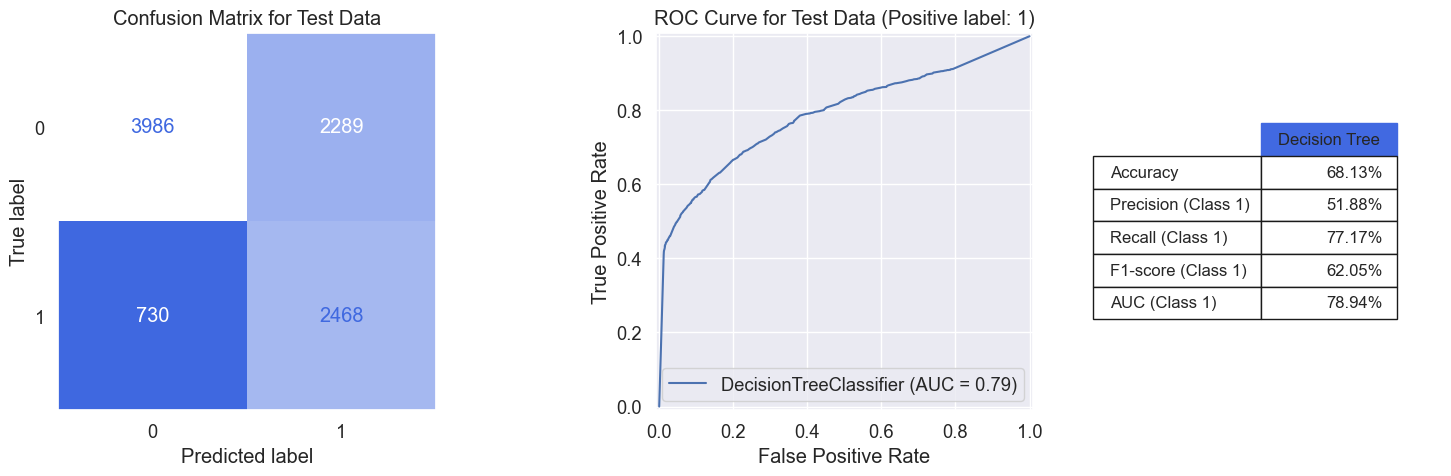

In [ ]:
model_evaluation(best_dt,X_over, X_test_scaled, y_over, y_test, "Decision Tree")

***Inference on Decision Tree Model performance on test data:***

> **Model Accuracy (68.13%):** Exhibits moderate predictive accuracy, correctly classifying 68.13% of instances into their respective classes (redeemed vs. unredeemed vouchers). The remaining 31.87% accounts for inaccuracies in predictions, encompassing both false positives and false negatives.

> **Precision for 'showedUp' (51.88%):** Moderate precision underscores the model's ability to minimize Type I errors (false positives) in predicting no-shows, optimizing resource allocation. The gap of 48.12% represents instances where the model incorrectly predicted no-shows as voucher redemptions.
>
> **Recall for 'showedUp' (77.17%):** Demonstrates solid sensitivity by accurately identifying a high percentage of true positives (actual redemptions), crucial for reducing Type II errors (false negatives) and safeguarding potential revenue. The shortfall of 22.83% points to the model's limitation in identifying all actual voucher redemptions.
>
> **F1-score for 'showedUp' (62.05%):** Reflects a well balanced measure of precision and recall, indicating the model's balanced predictive power for our primary class of interest. The missing 38.95% suggests room for improving the balance between minimizing false positives and capturing true positives.
>
> **AUC for 'showedUp' (78.94%):** Indicates a good discriminative ability between classes (redeemed vs. unredeemed vouchers), contributing to effective threshold optimization.
>
>The **Confusion Matrix** reveals the presence of a few false positives (730) and false negatives (2289), yet the model effectively limits these errors
>
> Additionally, the consistency in metric scores between the training and testing datasets suggests that the model is not overfitting and is effectively generalizing to new data.


In [ ]:
dt_result = metrics_calculator(best_dt, X_test_scaled, y_test, 'Decision Tree')


## DT Feature Importance

We can also apply feature importance calculation to the decision tree models. 

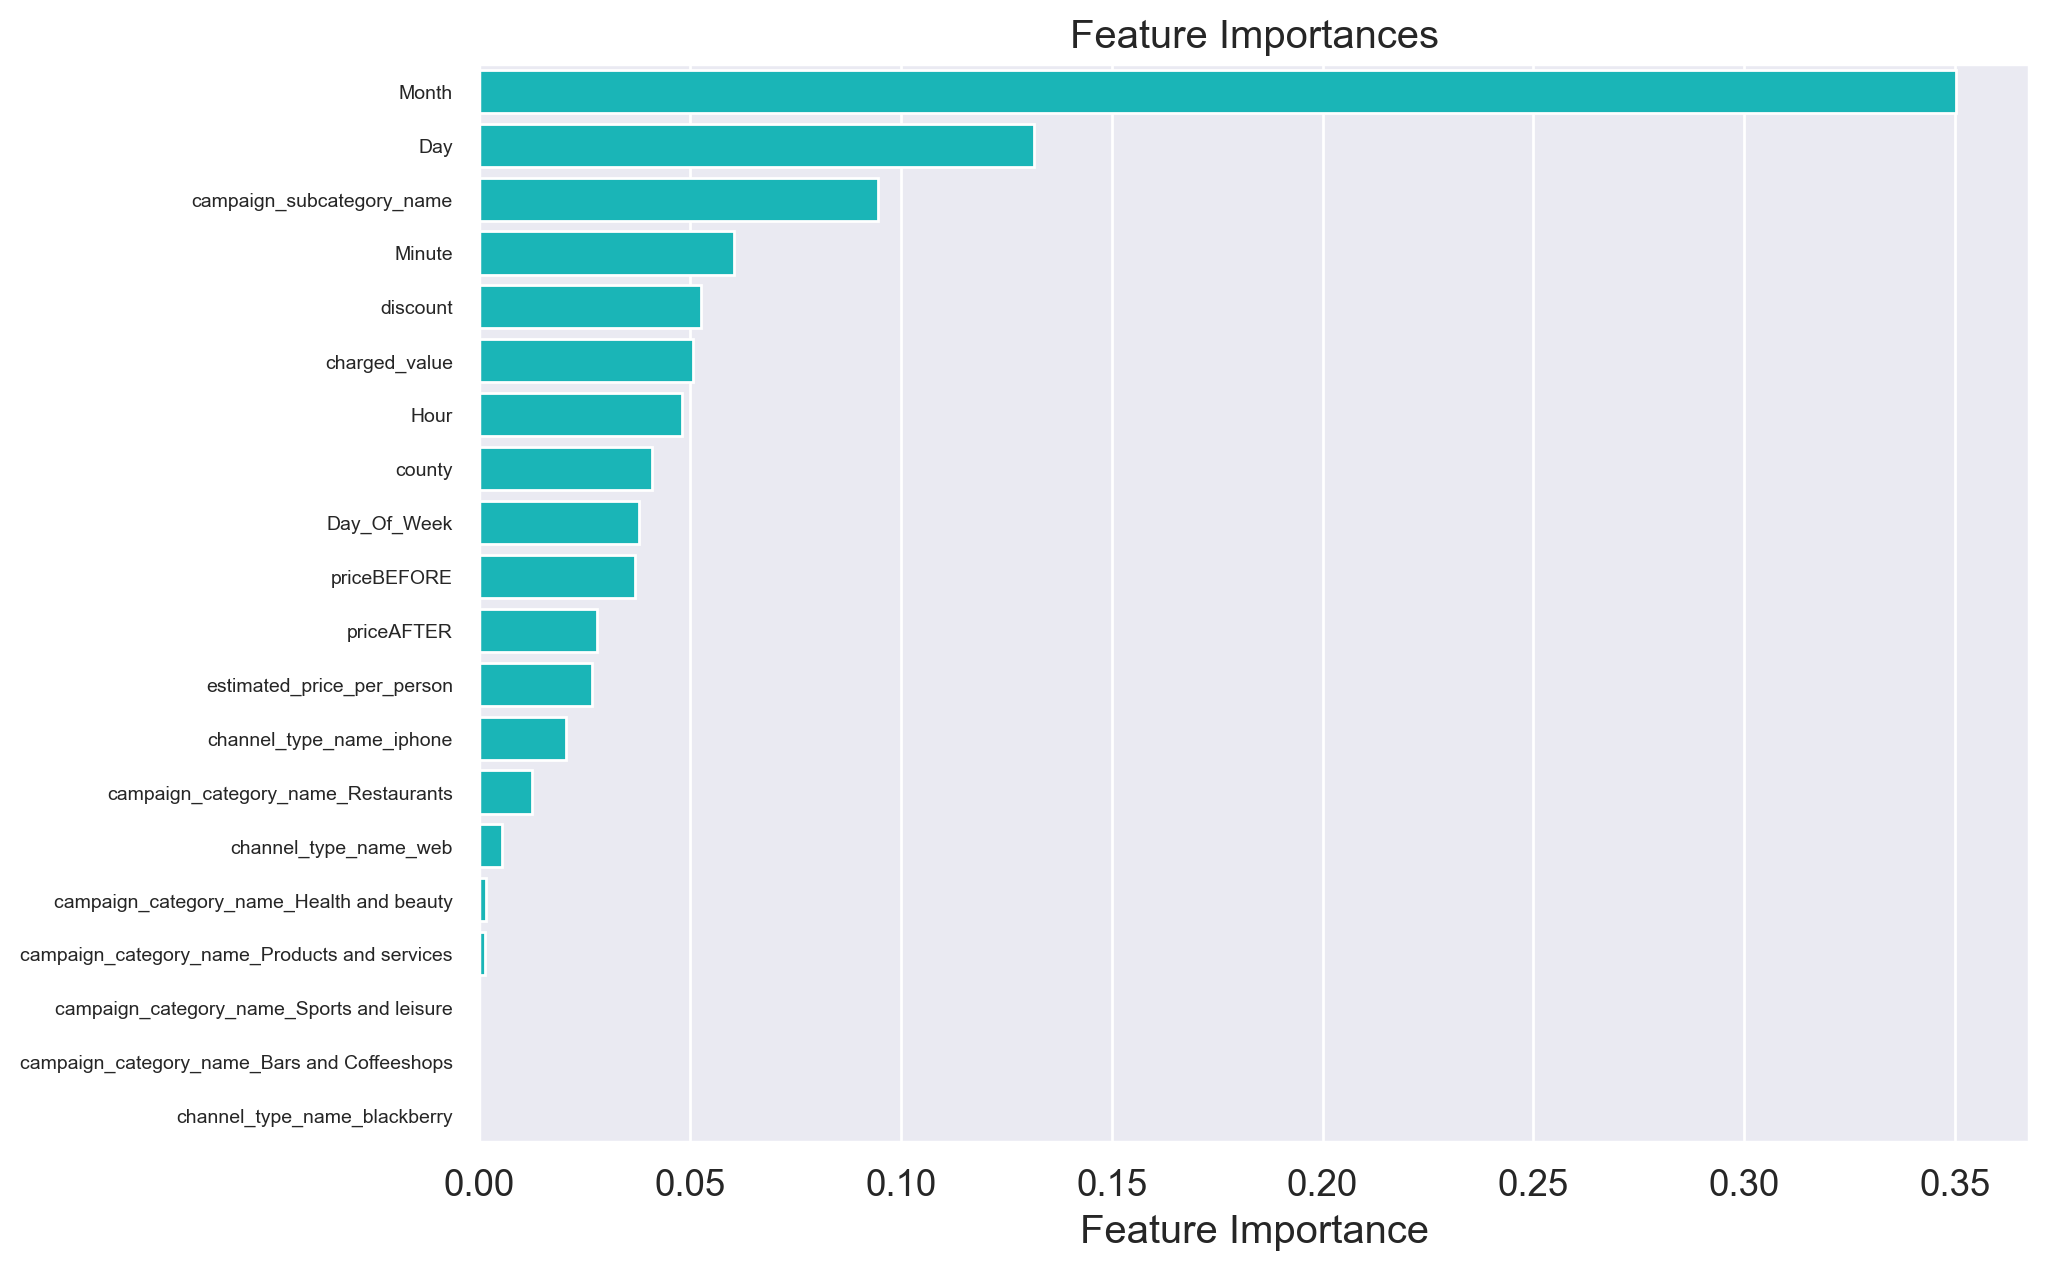

In [ ]:

feature_importances_dt = best_dt.feature_importances_

# Sort the feature importances in descending order and get the indices
sorted_indices_dt = np.argsort(feature_importances_dt)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 7), dpi=200)
sns.barplot(x=feature_importances_dt[sorted_indices_dt], y=x.columns[sorted_indices_dt], color='darkturquoise')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.yticks(fontsize=7)
plt.show()

In the analysis of the Decision Tree model, it's evident that factors such as the month, day, and campaign category name carry the most weight in predicting customer behavior. This indicates that the timing of appointments and the type of campaign being offered are crucial factors influencing whether customers will attend their appointments or not.

# Random Forest Model Building

Next we move on with the Random Forest model.

Both Random Forest and XGBoost are powerful extensions of decision trees that address some of the key limitations of individual trees, such as overfitting and scalability. They can deliver superior predictive performance across a wide range of datasets and problems, making them popular choices for machine learning tasks. So we expect to obtain better results.

## RF Base Model

In [ ]:
rf_base = RandomForestClassifier(random_state = 0, n_jobs = -1)

## RF Hyperparameter Tuning

In [ ]:
param_grid_rf = { "n_estimators" : [100,150],
                 "criterion" : ["entropy"],
                 "max_depth" : [16,18],
                 "min_samples_split" : [2,3,4],
                 "min_samples_leaf" : [1,2,3],
                 "class_weight" : [{0:1, 1:w} for w in [1,2,3]] }

In [ ]:
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_over, y_over)

In [ ]:
print( "Random Forest Optimal Hyperparameters : \n", best_rf_hyperparams)

Random Forest Optimal Hyperparameters : 
 {'class_weight': {0: 1, 1: 1}, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}


## RF Model Evaluation


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     25398
           1       0.99      0.91      0.95     25398

    accuracy                           0.95     50796
   macro avg       0.95      0.95      0.95     50796
weighted avg       0.95      0.95      0.95     50796


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      6275
           1       0.78      0.57      0.66      3198

    accuracy                           0.80      9473
   macro avg       0.80      0.75      0.76      9473
weighted avg       0.80      0.80      0.79      9473



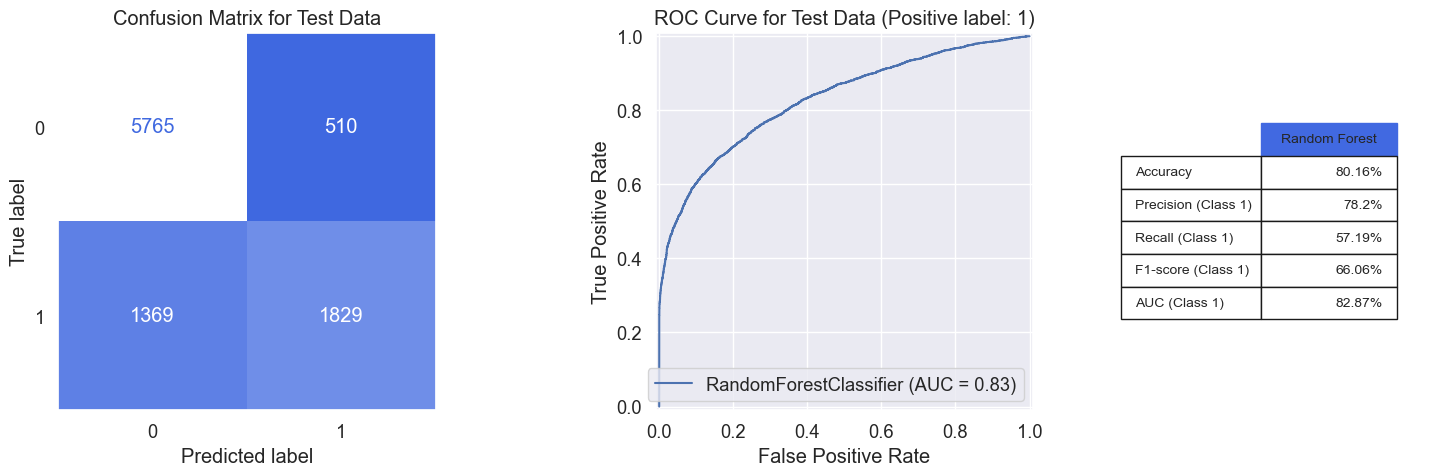

In [ ]:
model_evaluation(best_rf, X_over, X_test_scaled, y_over, y_test, "Random Forest")

***Inference on Decision Tree Model performance on test data:***

> **Model Accuracy (80.16%):** Demonstrates solid predictive accuracy, indicating robust model performance in voucher redemption and no-show predictions. The remaining 19.84% accounts for the inaccuracies in predictions, encompassing both false positives and false negatives.
>
> **Precision for 'showedUp' (78.2%):** This precision score underscores the model's effectiveness in minimizing Type I errors (false positives), allowing for accurate identification of no-show instances while recognizing the possibility of some misclassifications.
>
> **Recall for 'showedUp' (57.19%):** This recall score illustrates the model's sensitivity in identifying true positives, particularly redemptions. While it effectively captures a significant portion of actual redemptions, there remains a shortfall of approximately 42.81%, indicating areas where the model could improve in identifying all voucher redemptions accurately.
>
> **F1-score for 'showedUp' (66.06%):** Represents a well balanced measure of precision and recall, signifying the model's balanced predictive power for our primary class of interest. The difference of 33.94% indicates areas for enhancing the balance between minimizing false positives and capturing true positives, suggesting potential for refinement in model performance.
>
> **AUC for 'showedUp' (82.87%):** The AUC value demonstrates the model's strong discriminative ability between classes (redeemed vs. unredeemed vouchers), contributing to effective threshold optimization.
>
> The **Confusion Matrix** indicates a substantial level of accuracy in the model's predictions, with 5765 true negatives and 1829 true positives. However, there were 510 false negatives and 1369 false positives, indicating areas for improvement in detecting true positives and minimizing false negatives.
>
> Furthermore, the consistency in metric scores between the training and testing datasets suggests that the model is not overfitting and is effectively generalizing to new data.

In [ ]:
rf_result = metrics_calculator(best_rf, X_test_scaled, y_test, 'Random Forest')


### RF Feature Importance

Random Forest, being a tree-based ensemble model, can automatically compute feature importances. 

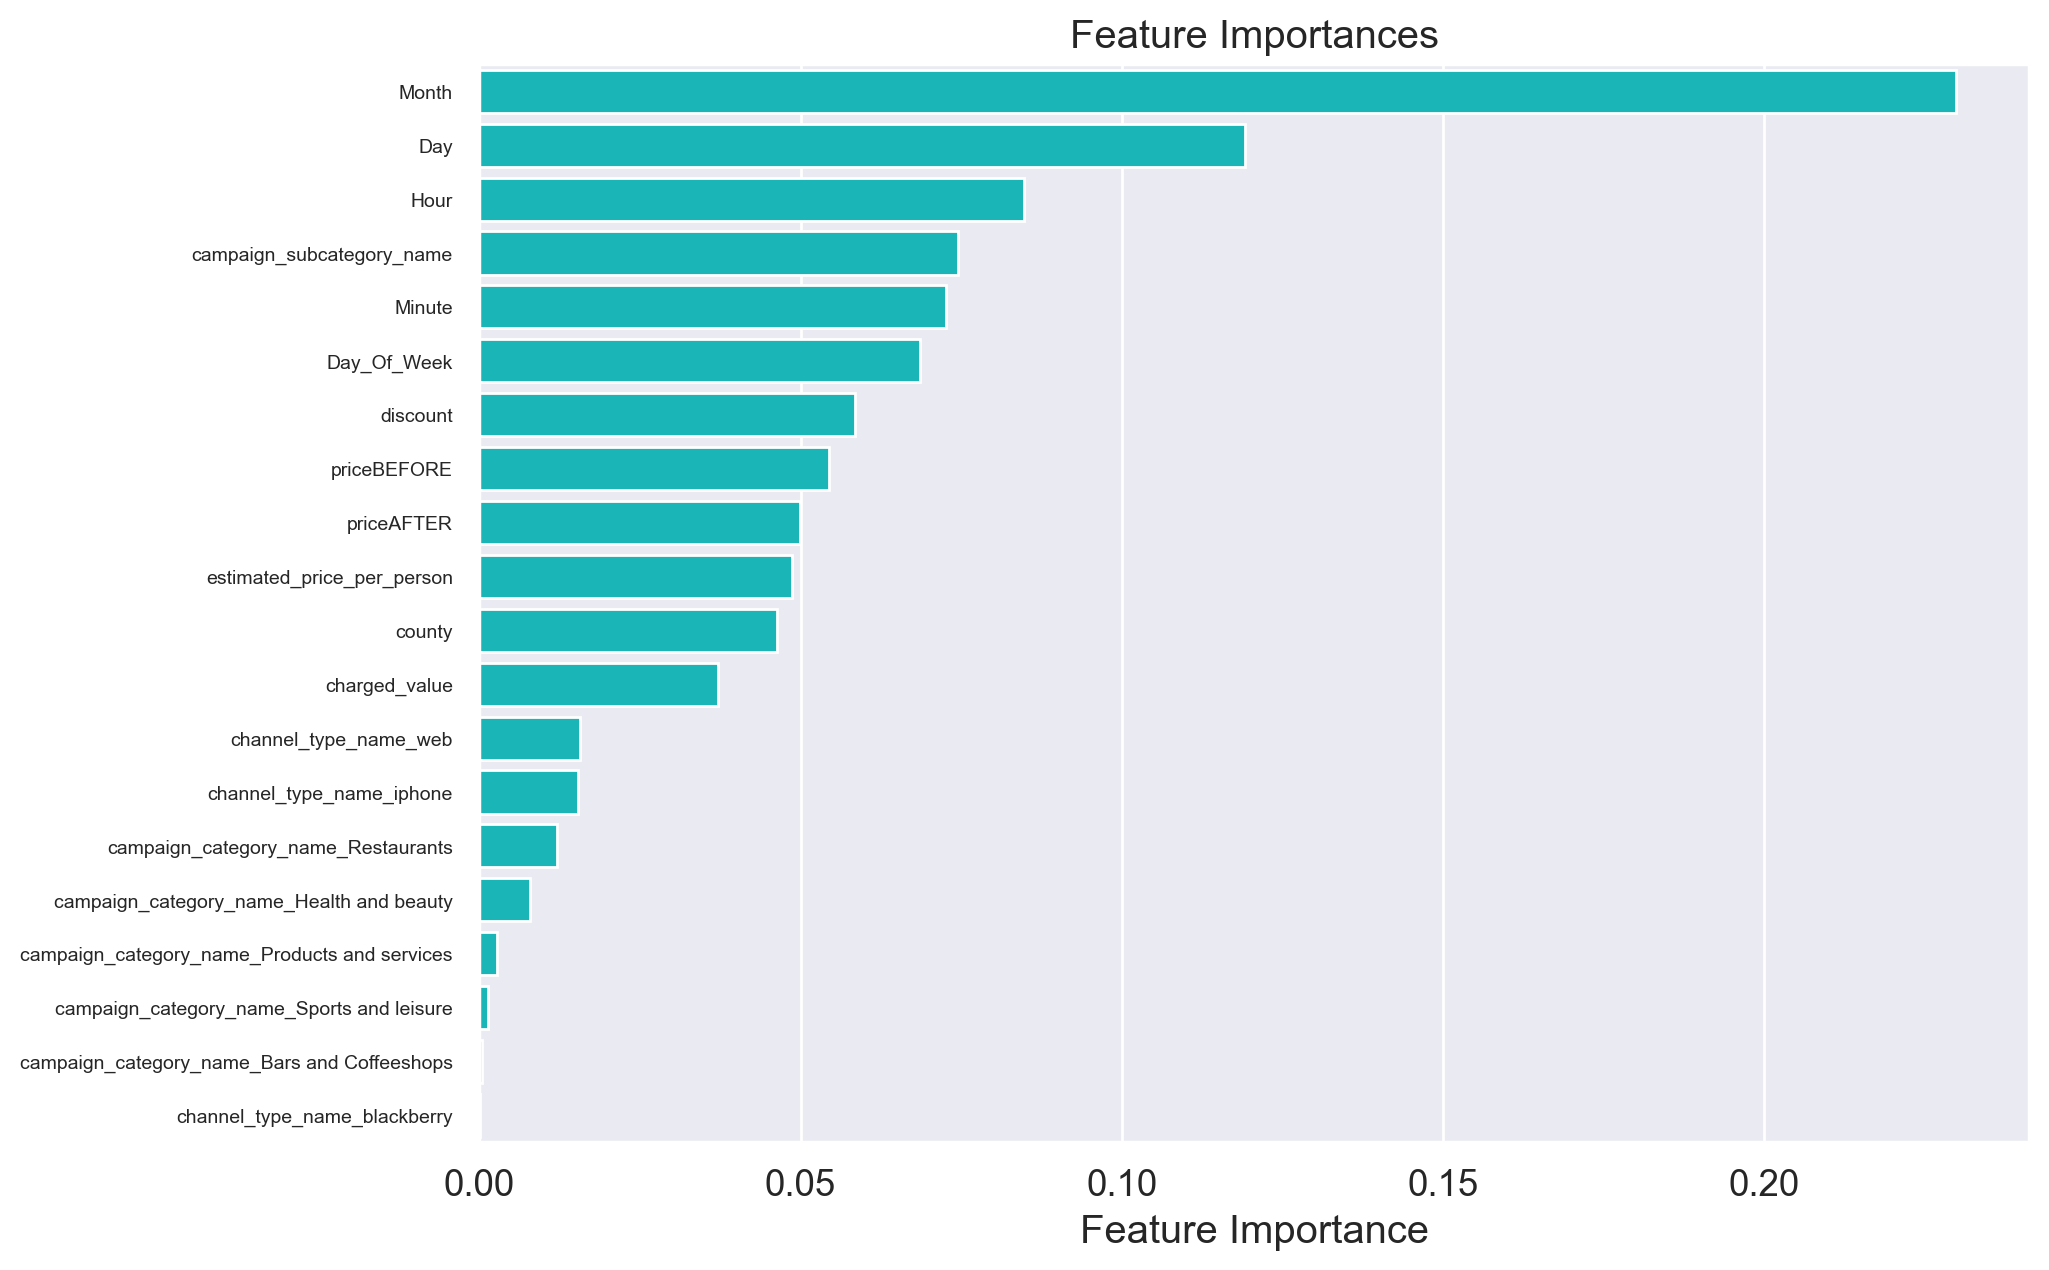

In [ ]:

feature_importances_rf = best_rf.feature_importances_

# Sort the feature importances in descending order and get the indices
sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 7), dpi=200)
sns.barplot(x=feature_importances_rf[sorted_indices_rf], y=x.columns[sorted_indices_rf], color='darkturquoise')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.yticks(fontsize=7)
plt.show()



In the Random Forest analysis, it becomes apparent that temporal factors such as the month, day, and hour hold the greatest sway over the model's predictions regarding customer shows and no-shows. 


# Neural Networks Model Building

Finally, we are going to use Neural Networks.

Neural Networks offer powerful modeling capabilities, allowing us to capture intricate patterns in the data. In our case, they'll help predict appointment attendance based on past records. This assists businesses in optimizing resource allocation and reducing costs associated with no-shows. We expect Neural Networks to provide superior predictive accuracy, enhancing operational efficiency.

## NN Base Model

We are performing the Neural Networks model first applying a default value of threshold of 0.55.

In [ ]:
def build_model():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_over.shape[1],)),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define class weights to balance precision and recall
class_weights = {0: 1, 1: 2} 
model = build_model()
history = model.fit(
    X_over, y_over,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
    verbose=0
)

# Predictions on training set
y_train_pred_probs = model.predict(X_over)
y_train_pred = (y_train_pred_probs > 0.55).astype(int)

# Predictions on test set
y_test_pred_probs = model.predict(X_test_scaled)
y_test_pred = (y_test_pred_probs > 0.55).astype(int)

## NN Model Evaluation

/Applications/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1588/1588 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.79      0.76     25398
           1       0.77      0.70      0.74     25398

    accuracy                           0.75     50796
   macro avg       0.75      0.75      0.75     50796
weighted avg       0.75      0.75      0.75     50796


Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      6275
           1       0.62      0.68      0.65      3198

    accuracy                           0.75      9473
   macro avg       0.72      0.73      0.73      9473
weighted avg       0.76      0.75      0.75      9473



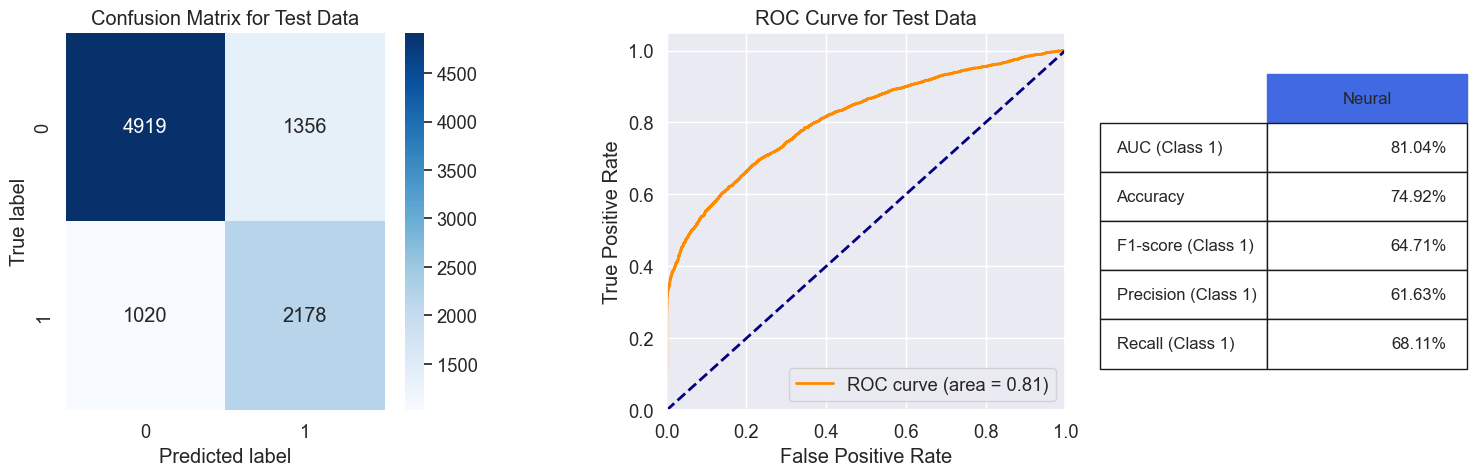

<Figure size 640x480 with 0 Axes>

In [ ]:
# Confusion matrix for training set
train_conf_matrix = confusion_matrix(y_over, y_train_pred)

# Confusion matrix for test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)


# Compute ROC curve and ROC area for test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_probs)
roc_auc = roc_auc_score(y_test, y_test_pred_probs)

def metrics_calculator(y_true, y_pred, y_pred_probs, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    The metrics are calculated specifically for class 1.
    '''
    result = pd.DataFrame({
        model_name: {
            'Accuracy': accuracy_score(y_true, y_pred) * 100,
            'Precision (Class 1)': precision_score(y_true, y_pred, pos_label=1) * 100,
            'Recall (Class 1)': recall_score(y_true, y_pred, pos_label=1) * 100,
            'F1-score (Class 1)': f1_score(y_true, y_pred, pos_label=1) * 100,
            'AUC (Class 1)': roc_auc_score(y_true, y_pred_probs) * 100
        }
    })
    return result

# Print classification reports to the console
print("Classification report for training set")
print("-------------------------------------------------------")
print(classification_report(y_over, y_train_pred))
print("\nClassification report for test set")
print("-------------------------------------------------------")
print(classification_report(y_test, y_test_pred))

# Generate the performance metrics for the test set using metrics_calculator
result_df = metrics_calculator(y_test, y_test_pred, y_test_pred_probs.ravel(), 'Neural')
result_df = result_df.applymap(lambda x: f"{x:.2f}%")

# Start plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})

# Plot confusion matrix
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax1)
ax1.set_title('Confusion Matrix for Test Data')
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True label')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_probs)
roc_auc = roc_auc_score(y_test, y_test_pred_probs)
ax2.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve for Test Data')
ax2.legend(loc="lower right")

# Create table for metrics
table = ax3.table(cellText=result_df.values, colLabels=result_df.columns, rowLabels=result_df.index, loc='center')
table.scale(1, 3)
table.set_fontsize(12)
ax3.axis('tight')
ax3.axis('off')

for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_color('royalblue')
        plt.tight_layout()
        plt.show()


plt.tight_layout()
plt.show()



 **Inferences on Neural Networks performance (threshold=0.55) on test data:**  

> **Model Accuracy (74.92%):** Demonstrates a fair level of predictive accuracy, correctly classifying 74.92% of instances into their respective categories (redeemed vs. unredeemed vouchers). The remaining 25.08% represents inaccuracies in predictions, encompassing both false positives and false negatives.

> **Precision for 'showedUp' (61.63%):** Reflects a modest level of precision, indicating the model's ability to minimize Type I errors (false positives) in predicting no-shows. However, approximately 38.37% of predictions in this category are incorrect, falsely predicting no-shows as voucher redemptions.
>
> **Recall for 'showedUp' (68.11%):** Demonstrates sensitivity in identifying true positives but falls short of optimal, leaving about 31.89% of redemptions unaccounted for. This highlights the need for improvement to prevent revenue loss from missed opportunities.
>
> **F1-score for 'showedUp' (64.71%):** Represents a balanced measure of precision and recall, illustrating the model's ability to balance minimizing false positives while capturing true positives. However, there's a gap of 35.29% suggesting potential for improvement in this balances.
>
> **AUC for 'showedUp' (81.04%):**  Indicates a good discriminative ability between classes (redeemed vs. unredeemed vouchers), contributing to effective threshold optimization.
>
>The **Confusion Matrix** reveals the presence of a some false positives (1020) and false negatives (1356), yet the model effectively limits these errors
>
> Moreover, the coherence in performance metrics across the training and testing datasets implies that the model is not exhibiting signs of overfitting and is adept at generalizing to novel data..


## NN Testing Best Threshold

Fine-tuning the prediction threshold significantly impacts precision, recall, and F1-scores, particularly for class 1, which signifies no-shows. Given the paramount importance of accurately predicting no-shows to mitigate losses, optimizing the F1-score for class 1 becomes essential. To determine the most effective threshold, we are assessing values of 0.45, 0.5, and 0.55.


In [ ]:
from sklearn.metrics import classification_report

thresholds_to_test = [0.45, 0.5, 0.55]

# Loop through each threshold
for threshold in thresholds_to_test:
    # Predictions on test set
    y_test_pred = (y_test_pred_probs > threshold).astype(int)

    # Print classification report for test set with current threshold
    print(f"\nClassification Report for Test Set (Threshold: {threshold}):")
    print("-" * 40)
    print(classification_report(y_test, y_test_pred))


Classification Report for Test Set (Threshold: 0.45):
----------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.61      0.72      6275
           1       0.52      0.81      0.63      3198

    accuracy                           0.68      9473
   macro avg       0.69      0.71      0.67      9473
weighted avg       0.75      0.68      0.69      9473


Classification Report for Test Set (Threshold: 0.5):
----------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      6275
           1       0.55      0.75      0.64      3198

    accuracy                           0.71      9473
   macro avg       0.70      0.72      0.70      9473
weighted avg       0.75      0.71      0.72      9473


Classification Report for Test Set (Threshold: 0.55):
----------------------------------------
              precision    recall  f1-score   support

    

After careful consideration, we've opted to set the threshold at 0.55. This decision stems from our observation that increasing the threshold from 0.45 to 0.55 results in a gradual enhancement of the F1-score for no-shows (class 1), elevating it from 0.63 to 0.65. By taking this step, we achieve a more favorable balance between accurately identifying true no-shows and minimizing false alarms.

It's important to note that these results were already showcased in the initial neural network analysis, where the default threshold of 0.55 was utilized.

## NN Feature Importance

We calculate feature importance using gradients in our non-tree-based neural network model to discern each feature's impact on predictions. This helps us understand which features significantly influence the model's decision-making process, guiding feature selection and enhancing interpretability.

In [ ]:
import tensorflow as tf

def calculate_feature_importance_gradients(model, inputs):
    '''
    Calculates the gradients of the model's predictions with respect to its inputs,
    which can be interpreted as feature importance scores.

    Args:
    - model: The trained neural network model.
    - inputs: Input data (e.g., a batch from the test set) for which feature importance is calculated.

    Returns:
    A NumPy array of gradients, indicating the importance of each feature.
    '''
    inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(inputs)
        predictions = model(inputs)

    # Calculate the gradients of the predictions with respect to the inputs
    gradients = tape.gradient(predictions, inputs)

    # Return the gradients as a NumPy array
    return gradients.numpy()

batch_size = 32
first_batch = X_test_scaled[:batch_size]
gradients = calculate_feature_importance_gradients(model, first_batch)

# Calculate the mean across the batch to get a single importance score per feature
mean_gradients = np.mean(gradients, axis=0)

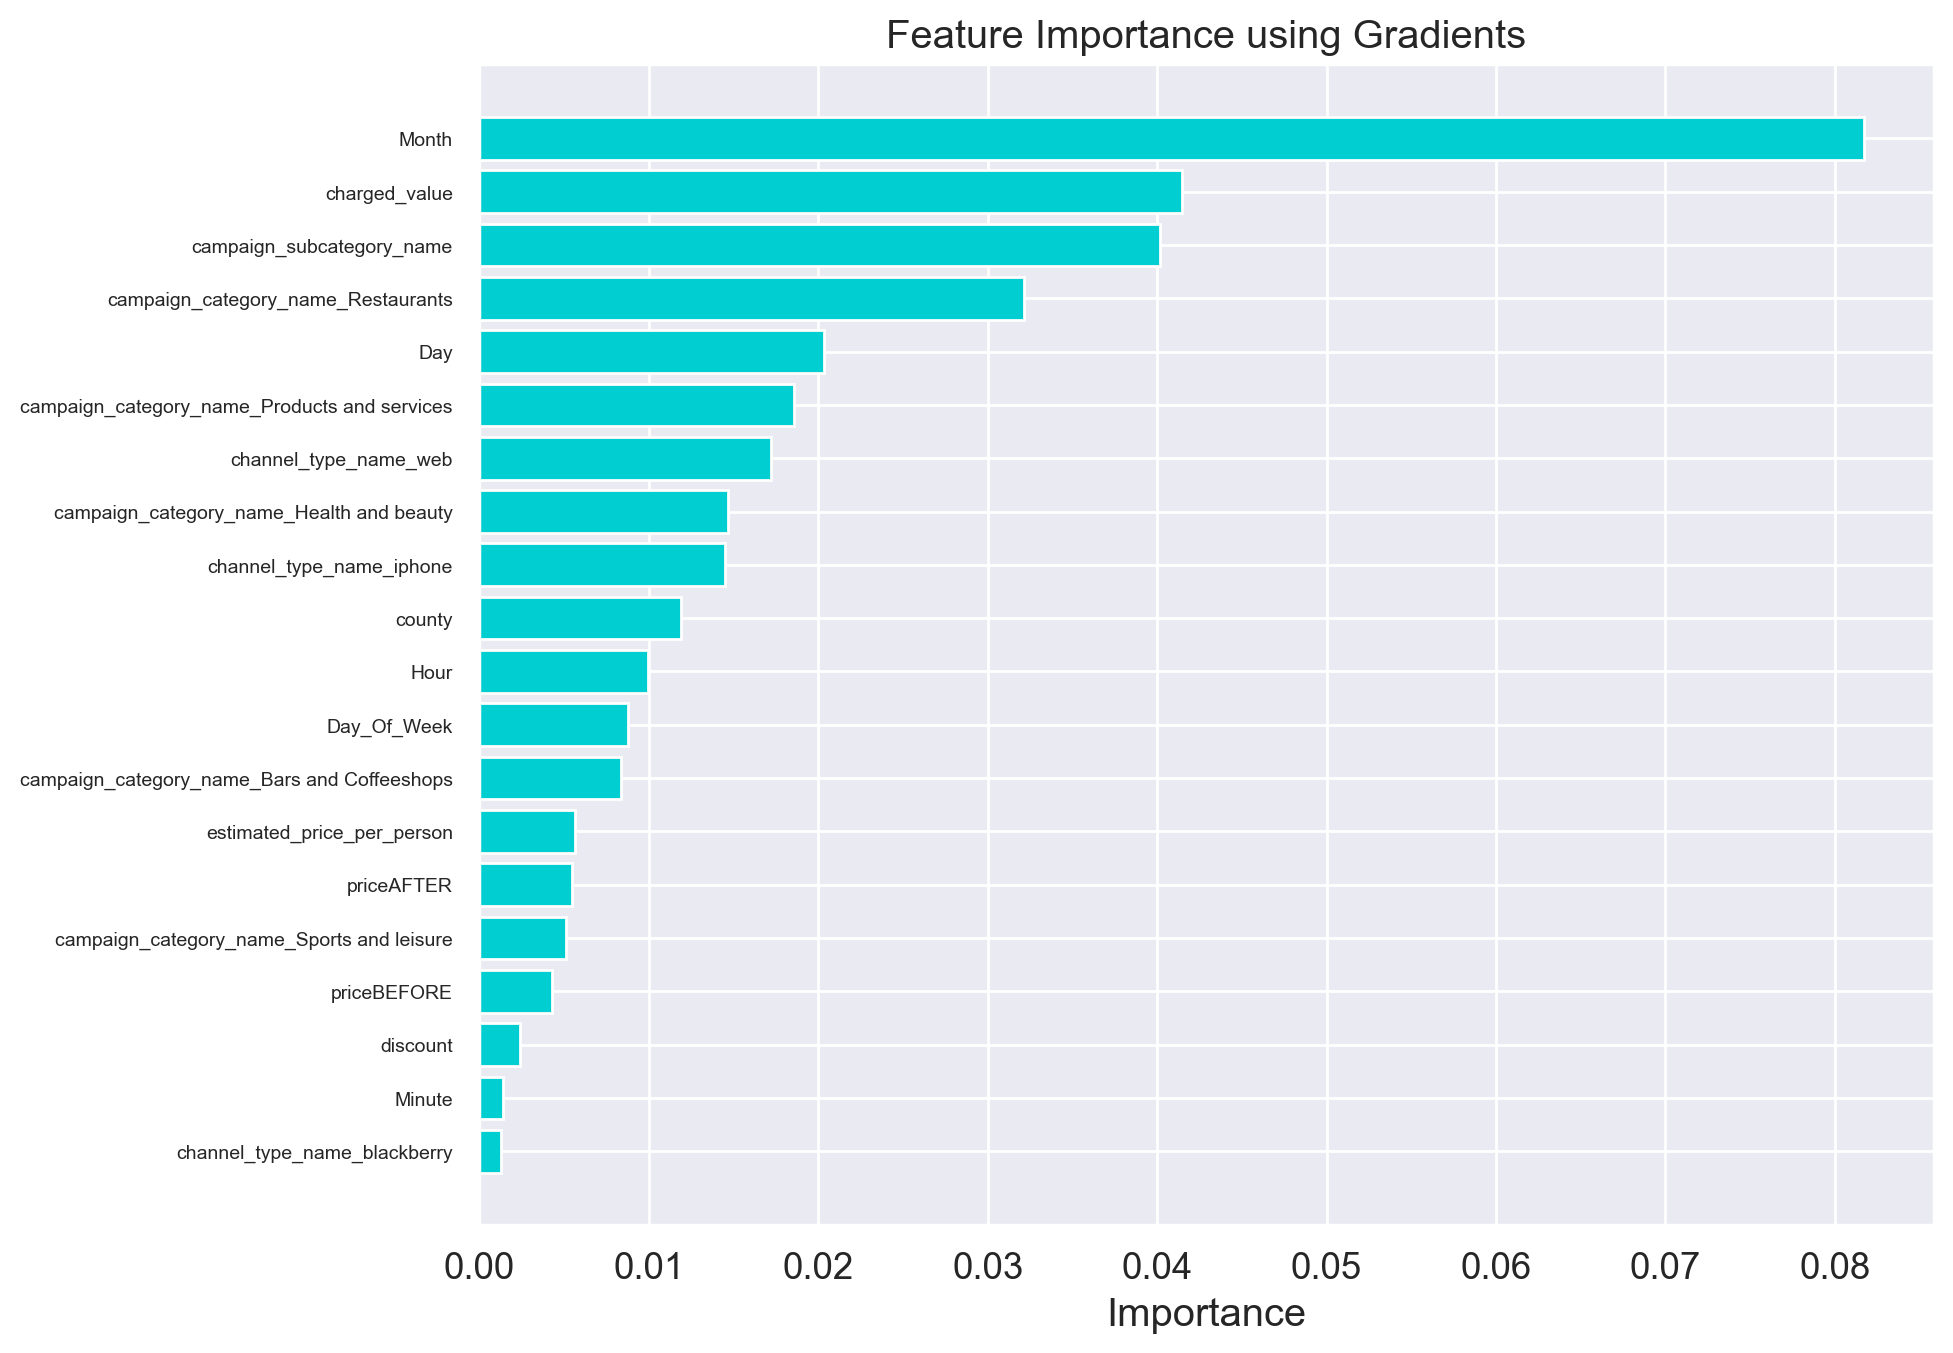

In [ ]:
sorted_indices = np.argsort(feature_importance)[::-1]

# Rearrange feature names and their corresponding importances
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importance = feature_importance[sorted_indices]

plt.figure(figsize=(10, 7), dpi=200)
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, color='darkturquoise')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names, fontsize=7)
plt.xlabel('Importance')
plt.title('Feature Importance using Gradients')
plt.gca().invert_yaxis() 
plt.tight_layout() 
plt.show()

In examining the Neural Networks model, factors like the month, charged value, and campaign subcategory name emerge as the top three features impacting the model's forecasts. This underscores the importance of temporal considerations, financial aspects, and the nature of campaign offerings in anticipating customer behavior.

## Models Comparison

In order to decide the best model for our business case, we joined in one table the test results from the 4 models.

In [ ]:
results = pd.concat([dt_result, rf_result, xgb_result, result_df], axis = 1).T
results

,Accuracy,Precision (Class 1),Recall (Class 1),F1-score (Class 1),AUC (Class 1)
Decision Tree,68.13%,51.88%,77.17%,62.05%,78.94%
Random Forest,80.16%,78.2%,57.19%,66.06%,82.87%
XGBoost,80.13%,73.58%,64.2%,68.57%,82.66%
Neural,74.92%,61.63%,68.11%,64.71%,81.04%


**Inferences for model comparison** :

Given the business problem outlined for CouponSavvy, the primary objective is to accurately predict customer no-shows to mitigate financial losses for merchants and maintain positive business relationships.

Based on this objective, we have prioritized a predictive model tailored to accurately identify customers likely to miss their appointments. This prioritization is rooted in the recognition that false negatives—where a customer is incorrectly assumed to attend when they do not—pose both direct financial costs for merchants and potential reputational risks for our company. Therefore, we have favored a model with a high recall score, indicating its effectiveness in maximizing the identification of true no-shows while minimizing false negatives. By emphasizing high recall, our aim is to minimize the financial impact on merchants and uphold our platform's reputation as a reliable and merchant-friendly digital marketplace. This strategic decision underscores our commitment to supporting merchant success and maintaining their trust in our platform.


***Recommended Model:*** 

Considering these considerations and the business context, the Neural model emerges as the most suitable choice. It achieves a good balance between precision (61.63%) and recall (68.11%) for Class 1, effectively identifying true no-shows while minimizing false positives. Additionally, its high accuracy (74.92%) and AUC (81.04%) further support its suitability for addressing CouponSavvy's business challenge. 

Moreover, the Neural model's ability to grasp intricate data patterns and adapt to nonlinear relationships makes it the optimal choice for CouponSavvy's predictive analytics needs. It provides a reliable foundation for mitigating no-show instances and enhancing merchant satisfaction.

## Conclusion and insights

Our marketplace model, which bills merchants for each customer booking, exposes them to financial risk in case of customer no-shows. This undermines both merchant satisfaction and profitability, necessitating an accurate strategy to forecast no-shows. By anticipating such occurrences, we aim to minimize merchant losses, maintain trust in our platform, and attract and retain merchants effectively.

To tackle this, we've developed a tailored predictive model focused on identifying customers likely to miss appointments. Emphasizing high recall, the model reduces false negatives and lightens the financial load on merchants. It also enables us to provide proactive recommendations, helping merchants optimize operations and mitigate customer no-shows, fostering stronger trust and collaboration.

Consistently delivering accurate predictions cements our reputation as a dependable marketplace. Merchants rely on us not just for bookings but also for insights and support, enhancing merchant satisfaction and solidifying our position as the go-to platform for reliable solutions in the digital marketplace.
